# Flight Delays Explanatory Data Analysis


**Agenda**
 1.   Initial Data Inspection
 2.   Summary Statistics

 3.   Explanatory Data Analysis - EDA
 4.   Data Preprocessing


In [ ]:
### Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import datetime
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings

warnings.filterwarnings('ignore')

In [ ]:

#set display max column to see all column
pd.set_option("display.max_columns", None)
pd.get_option("display.max_columns")

#set display max column to see all column
pd.set_option("display.max_rows", 150)
pd.get_option("display.max_rows")

150

## 1. Initial Data Inspection:

### 1.1 Load Data

In [ ]:
# load datasets

train = pd.read_csv('/content/drive/MyDrive/Machine Learning 1 - final Project/delays_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Machine Learning 1 - final Project/delays_test.csv')

 **Dataset Description**

*    Weekday – Day of the week when the flight occurred (1 for Sunday, 7 for Saturday).
*    Month_of_Year – The numerical month (1-12) when the flight took place.
*    Day_of_Month – The day of the month (1-31) when the flight occurred.
*    Scheduled_Departure_Time – The scheduled local time of flight departure.
*    Scheduled_Arrival_Time – The scheduled local time of flight arrival.
*    Marketing_Airline – The airline code under which the flight was marketed.
*    Marketing_Airline_DOT_ID – Department of Transportation identifier for the marketing airline.
*    Flight_Number – The number assigned to the flight by the operating airline.
*    Origin_Airport_ID – Unique identifier for the departure airport.
*    Destination_Airport_ID – Unique identifier for the arrival airport.
*    Flight_Cancelled – Indicator of whether the flight was cancelled (1 = Yes, 0 = No).
*    Departure_State – The state code of the departure location.
*    Arrival_State – The state code of the arrival location.
*    Departure_Delay – Total delay in minutes at departure.
*    Diverted_Airport_Landings – Count of unplanned landings at other airports.
*    Taxi_Out_Time – Time in minutes from gate departure until takeoff.
*    Taxi_In_Time – Time in minutes from landing to gate arrival.
*    Flight_Diverted – Indicator of whether the flight was diverted (1 = Yes, 0 = No).
*    Actual_Departure_Time – The actual local time the flight departed.
*    Flight_Duration – The duration of the flight in minutes from takeoff to landing.
*    Flight_Distance – The total distance covered by the flight in miles.
*    Origin_Temperature – The temperature at the origin airport at the time of the flight’s departure.
*    Destination_Temperature – The temperature at the destination airport at the time of the flight’s arrival.
*    Origin_Wind_Speed – The wind speed at the origin airport during the departure of the flight.
*    Destination_Wind_Speed – The wind speed at the destination airport during the departure of the flight.
*    Origin_Precipitation – The amount of precipitation, such as rain or snow, at the origin airport around the flight’s departure time.
*   Destination_Precipitation – The amount of precipitation, such as rain or snow, at the destination airport around the flight’s arrival time.
*    Arrival_Delay – Total delay in minutes at arrival (**outcome variable**, only in the training sample)

Our target is **Arrival_Delay** in minutes, we need build a model to predict delays



### 1.2 Inspecting the First Few Rows

In [ ]:
# show first 7 rows for each dataset
print('Test Dataset first 7 rows \n')
display(train.head(7))
print('_' * 100)
print('Test Dataset first 7 rows \n')
display(test.head(7))

Test Dataset first 7 rows 



Weekday  Month_of_Year  Day_of_Month  Scheduled_Departure_Time  \
0        6              6            25                      1222   
1        2              6            21                      1216   
2        3              1             5                      1945   
3        2              3            22                       700   
4        4              7            14                      2130   
5        1              5            30                       750   
6        5              2             4                       620   

   Scheduled_Arrival_Time Marketing_Airline  Marketing_Airline_DOT_ID  \
0                    1444                B6                     20409   
1                    1304               NaN                     19805   
2                    2055                DL                     19790   
3                     924                AA                     19805   
4                    2359               NaN                     19930   
5                     915                WN                     19393   
6                     830                AA                     19805   

   Flight_Number  Origin_Airport_ID  Destination_Airport_ID  Flight_Cancelled  \
0            520              10397                 12478.0             False   
1           6297              14107                 15376.0             False   
2           4124              13487                 13076.0             False   
3           1538              15624                 11298.0             False   
4           1116              14747                 12889.0             False   
5           1336              14831                 14679.0             False   
6           5162              12451                 14100.0             False   

  Departure_State Arrival_State  Departure_Delay  Arrival_Delay  \
0              GA            NY              NaN            NaN   
1              AZ            AZ         0.088687      -4.178483   
2              MN            WI              NaN       5.042185   
3              FL            TX        -1.802698      -0.206932   
4              WA            NV              NaN      14.006092   
5              CA            CA        -2.181755     -14.067374   
6              FL            PA              NaN      -8.020469   

   Diverted_Airport_Landings  Taxi_Out_Time  Taxi_In_Time  Flight_Diverted  \
0                          0           16.0          10.0            False   
1                          0           16.0           5.0            False   
2                          0           34.0           5.0            False   
3                          0           10.0          11.0            False   
4                          0           23.0           7.0            False   
5                          0           10.0           5.0            False   
6                          0           25.0           7.0            False   

   Actual_Departure_Time  Flight_Duration  Flight_Distance  \
0                 1224.0            107.0            760.0   
1                 1216.0             23.0            110.0   
2                 1945.0             36.0            119.0   
3                  658.0            125.0            641.0   
4                 2133.0            130.0            867.0   
5                  748.0             58.0            417.0   
6                  612.0             98.0            742.0   

   Origin_Temperature  Destination_Temperature  Origin_Wind_Speed  \
0           25.140220                19.357739          21.019808   
1           13.279939                20.470690          18.045064   
2           17.816202                13.967273          21.606228   
3           24.562566                14.509228          24.946489   
4            8.817992                10.866812          17.426336   
5            9.360464                15.977111          19.001179   
6           12.161363                15.525234          23.303311   

   D

____________________________________________________________________________________________________
Test Dataset first 7 rows 



Weekday  Month_of_Year  Day_of_Month  Scheduled_Departure_Time  \
0        2              5            10                       820   
1        3              3             9                       526   
2        3              3             9                      1651   
3        5              4            15                      1133   
4        3              5            11                      1507   
5        2              3            22                       614   
6        3              2            16                      1420   

   Scheduled_Arrival_Time Marketing_Airline  Marketing_Airline_DOT_ID  \
0                    1011                AA                     19805   
1                     655               NaN                     19790   
2                    1943                DL                     19790   
3                    1245                UA                     19977   
4                    1752                NK                     20416   
5                    1050                NK                     20416   
6                    1700                WN                     19393   

   Flight_Number  Origin_Airport_ID  Destination_Airport_ID  Flight_Cancelled  \
0           4808              12478                 14492.0             False   
1           3688              14489                 14747.0             False   
2           1713              14635                 11433.0             False   
3           4712              11298                 11292.0             False   
4           1399              11618                 13204.0             False   
5           2955              12889                     NaN             False   
6           1383              13204                 12953.0             False   

  Departure_State Arrival_State  Departure_Delay  Diverted_Airport_Landings  \
0              NY            NC        -1.297456                          0   
1              OR            WA        -1.932714                          0   
2              FL            MI        13.599264                          0   
3              TX            CO        12.887706                          0   
4              NJ            FL              NaN                          0   
5              NV            TX        -4.967599                          0   
6              FL            NY        -0.005079                          0   

   Taxi_Out_Time  Taxi_In_Time  Flight_Diverted  Actual_Departure_Time  \
0           31.0          10.0            False                  819.0   
1           27.0           5.0            False                  524.0   
2           16.0           5.0            False                 1705.0   
3           18.0          13.0            False                 1146.0   
4           18.0          14.0            False                 1737.0   
5           19.0          16.0            False                  609.0   
6            8.0           9.0            False                 1420.0   

   Flight_Duration  Flight_Distance  Origin_Temperature  \
0             64.0            427.0           11.274087   
1             53.0            228.0            4.967302   
2            134.0           1084.0           18.483917   
3            107.0            641.0           12.932652   
4            125.0            937.0           18.982421   
5            132.0           1055.0           19.928037   
6            129.0            950.0            6.768660   

   Destination_Temperature  Origin_Wind_Speed  Destination_Wind_Speed  \
0                16.012261          17.332261               24.629961   
1                18.358241          17.795975               15.307041   
2                16.467901          18.704558               17.468001   
3                18.790894          14.105251               25.659088   
4                15.382372          22.579627               19.144705   
5                19.817684          16.473851               24.841797   
6     

### 1.3 Understanding Data Types and Missing Values

In [ ]:
# display train data info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631327 entries, 0 to 1631326
Data columns (total 28 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Weekday                    1631327 non-null  int64  
 1   Month_of_Year              1631327 non-null  int64  
 2   Day_of_Month               1631327 non-null  int64  
 3   Scheduled_Departure_Time   1631327 non-null  int64  
 4   Scheduled_Arrival_Time     1631327 non-null  int64  
 5   Marketing_Airline          1467776 non-null  object 
 6   Marketing_Airline_DOT_ID   1631327 non-null  int64  
 7   Flight_Number              1631327 non-null  int64  
 8   Origin_Airport_ID          1631327 non-null  int64  
 9   Destination_Airport_ID     1468233 non-null  float64
 10  Flight_Cancelled           1631327 non-null  bool   
 11  Departure_State            1631327 non-null  object 
 12  Arrival_State              1631327 non-null  object 
 13  Departure_De

**Overview** of **Train** Dataset
*    The dataset contains 1,631,327 entries (rows) and 27 columns.

*    The columns are of different data types:
        * integer (int64)
        * float (float64)
        * bool (0 or 1)
        * object (usually representing string or categorical data).

*    The dataset contains some missing values. Specifically, the columns Marketing Airline DOT ID, Destination Airport ID, Departure Delay, Arrival Delay, Taxi Out Time, Taxi In Time, Actual Departure Time, Flight Duration, Flight Distance, Origin Temperature, Destination Temperature, Origin Wind Speed and Destination Wind Speed have a certain number of non-null entries, indicating that there are some missing values in these columns.


In [ ]:
# display test data info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407832 entries, 0 to 407831
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Weekday                    407832 non-null  int64  
 1   Month_of_Year              407832 non-null  int64  
 2   Day_of_Month               407832 non-null  int64  
 3   Scheduled_Departure_Time   407832 non-null  int64  
 4   Scheduled_Arrival_Time     407832 non-null  int64  
 5   Marketing_Airline          367468 non-null  object 
 6   Marketing_Airline_DOT_ID   407832 non-null  int64  
 7   Flight_Number              407832 non-null  int64  
 8   Origin_Airport_ID          407832 non-null  int64  
 9   Destination_Airport_ID     367011 non-null  float64
 10  Flight_Cancelled           407832 non-null  bool   
 11  Departure_State            407832 non-null  object 
 12  Arrival_State              407832 non-null  object 
 13  Departure_Delay            35

**Overview** of **Train** Dataset
*    The dataset contains 407832 entries (rows) and 27 columns.

*    The columns are of different data types:
        * integer (int64)
        * float (float64)
        * bool (0 or 1)
        * object (usually representing string or categorical data).

*    The dataset contains some missing values. Specifically, the columns Marketing Airline DOT ID, Destination Airport ID, Departure Delay, Arrival Delay, Taxi Out Time, Taxi In Time, Actual Departure Time, Flight Duration, Flight Distance, Origin Temperature, Destination Temperature, Origin Wind Speed and Destination Wind Speed have a certain number of non-null entries, indicating that there are some missing values in these columns.


# 2. Summary Statistics

I noticed that scheduled departure time, scheduled arrival time, actual departure time column are given as numbers: 1444, 1568, 2334, 740. I will convert them as oclock format: 14:44:00, 15:68:00 etc.

In [ ]:
# function to separate time into hours and minutes
def split_time(time_val):
    time_val = str(int(time_val)).split('.')[0].zfill(4)  # ensure the time is in 'HHMM' format
    hour = int(time_val[:2])
    minute = int(time_val[2:])
    return hour, minute

# apply the function only to non-missing values
time_columns = ['Scheduled_Departure_Time', 'Scheduled_Arrival_Time', 'Actual_Departure_Time']

for col in time_columns:
  train[col + '_Hour'] = train[col].dropna().apply(lambda x: split_time(x)[0] if not pd.isna(x) else np.nan).astype(int)
  train[col + '_Minute'] = train[col].dropna().apply(lambda x: split_time(x)[1] if not pd.isna(x) else np.nan).astype(int)

  # Handle missing values separately
  train[col + '_Hour'].fillna(np.nan, inplace=True)
  train[col + '_Minute'].fillna(np.nan, inplace=True)

train.head()

Weekday  Month_of_Year  Day_of_Month  Scheduled_Departure_Time  \
0        6              6            25                      1222   
1        2              6            21                      1216   
2        3              1             5                      1945   
3        2              3            22                       700   
4        4              7            14                      2130   

   Scheduled_Arrival_Time Marketing_Airline  Marketing_Airline_DOT_ID  \
0                    1444                B6                     20409   
1                    1304               NaN                     19805   
2                    2055                DL                     19790   
3                     924                AA                     19805   
4                    2359               NaN                     19930   

   Flight_Number  Origin_Airport_ID  Destination_Airport_ID  Flight_Cancelled  \
0            520              10397                 12478.0             False   
1           6297              14107                 15376.0             False   
2           4124              13487                 13076.0             False   
3           1538              15624                 11298.0             False   
4           1116              14747                 12889.0             False   

  Departure_State Arrival_State  Departure_Delay  Arrival_Delay  \
0              GA            NY              NaN            NaN   
1              AZ            AZ         0.088687      -4.178483   
2              MN            WI              NaN       5.042185   
3              FL            TX        -1.802698      -0.206932   
4              WA            NV              NaN      14.006092   

   Diverted_Airport_Landings  Taxi_Out_Time  Taxi_In_Time  Flight_Diverted  \
0                          0           16.0          10.0            False   
1                          0           16.0           5.0            False   
2                          0           34.0           5.0            False   
3                          0           10.0          11.0            False   
4                          0           23.0           7.0            False   

   Actual_Departure_Time  Flight_Duration  Flight_Distance  \
0                 1224.0            107.0            760.0   
1                 1216.0             23.0            110.0   
2                 1945.0             36.0            119.0   
3                  658.0            125.0            641.0   
4                 2133.0            130.0            867.0   

   Origin_Temperature  Destination_Temperature  Origin_Wind_Speed  \
0           25.140220                19.357739          21.019808   
1           13.279939                20.470690          18.045064   
2           17.816202                13.967273          21.606228   
3           24.562566                14.509228          24.946489   
4            8.817992                10.866812          17.426336   

   Destination_Wind_Speed  Origin_Precipitation  Destination_Precipitation  \
0               15.452723                   0.0                        0.0   
1               12.910265                   0.0                        0.0   
2               17.976362                   0.0                        0.1   
3               22.630553                   0.0                        0.0   
4               17.401007                   0.0                        0.0   

   Scheduled_Departure_Time_Hour  Scheduled_Departure_Time_Minute  \
0                             12                               22   
1                             12                               16   
2                             19                               45   
3                              7                                0   
4                             21                               30   

   Scheduled_Arrival_Time_Hour  Scheduled_Arrival_Time_Minute  \
0                           14                       

In [ ]:
# summary statistics for numerical columns
train.describe().T

count          mean          std  \
Weekday                          1631327.0      4.006004     2.007859   
Month_of_Year                    1631327.0      4.083974     1.998498   
Day_of_Month                     1631327.0     15.716340     8.759763   
Scheduled_Departure_Time         1631327.0   1329.792697   490.390147   
Scheduled_Arrival_Time           1631327.0   1486.054845   518.651246   
Marketing_Airline_DOT_ID         1631327.0  19830.814435   276.149520   
Flight_Number                    1631327.0   2561.291526  1745.164808   
Origin_Airport_ID                1631327.0  12660.010812  1522.940497   
Destination_Airport_ID           1468233.0  12658.283969  1521.782625   
Departure_Delay                  1424866.0     13.114897    53.959023   
Arrival_Delay                    1420021.0      7.504105    55.624001   
Diverted_Airport_Landings        1631327.0      0.003753     0.117073   
Taxi_Out_Time                    1582102.0     16.958901     9.472624   
Taxi_In_Time                     1581460.0      7.896293     6.660543   
Actual_Departure_Time            1583001.0   1334.421481   505.486034   
Flight_Duration                  1419837.0    111.075707    70.028859   
Flight_Distance                  1468137.0    797.995899   591.409559   
Origin_Temperature               1468137.0     16.592391     5.139057   
Destination_Temperature          1468137.0     16.597125     5.133726   
Origin_Wind_Speed                1419837.0     20.075610     4.304679   
Destination_Wind_Speed           1419837.0     20.080640     4.302041   
Origin_Precipitation             1631327.0      0.104993     0.335559   
Destination_Precipitation        1631327.0      0.105309     0.335906   
Scheduled_Departure_Time_Hour    1631327.0     13.027308     4.879852   
Scheduled_Departure_Time_Minute  1631327.0     27.061914    18.198596   
Scheduled_Arrival_Time_Hour      1631327.0     14.564649     5.182889   
Scheduled_Arrival_Time_Minute    1631327.0     29.589955    17.635203   
Actual_Departure_Time_Hour       1583001.0     13.040466     5.062457   
Actual_Departure_Time_Minute     1583001.0     30.374926    17.779867   

                                          min           25%           50%  \
Weekday                              1.000000      2.000000      4.000000   
Month_of_Year                        1.000000      2.000000      4.000000   
Day_of_Month                         1.000000      8.000000     16.000000   
Scheduled_Departure_Time             1.000000    915.000000   1320.000000   
Scheduled_Arrival_Time               1.000000   1103.000000   1512.000000   
Marketing_Airline_DOT_ID         19393.000000  19790.000000  19805.000000   
Flight_Number                        1.000000   1106.000000   2228.000000   
Origin_Airport_ID                10135.000000  11292.000000  12889.000000   
Destination_Airport_ID           10135.000000  11292.000000  12889.000000   
Departure_Delay                    -78.328135     -5.075141     -1.571396   
Arrival_Delay                     -100.042295    -14.416630     -5.111228   
Diverted_Airport_Landings            0.000000      0.000000      0.000000   
Taxi_Out_Time                        1.000000     11.000000     15.000000   
Taxi_In_Time                         1.000000      4.000000      6.000000   
Actual_Departure_Time                1.000000    917.000000   1325.000000   
Flight_Duration                      8.000000     60.000000     93.000000   
Flight_Distance                     31.000000    368.000000    643.000000   
Origin_Temperature                  -7.807180     13.116510     16.577944   
Destination_Temperature             -8.314730     13.133901     16.585848   
Origin_Wind_Speed                    1.721443     17.091638     19.867766   
Destination_Wind_Speed               1.989253     17.094005     19.878122   
Origin_Precipitation                 0.000000      0.000000      0.000000   
Destination_Precipitation            0.000000      0.000000      0.000000  


Inferences:

*    Weekday, Day_of_Month, Month_of_Year and last 6 columns: These features show the scheduled departure date and time. They have a good range and seem to be evenly distributed throughout the year and day.
*    Scheduled Departure Time, Scheduled Arrival Time and Actula Departure Time: These are the actual and scheduled departure and arrival times of the flights. They are in the 24-hour format and cover all possible values.
*   Departure Delay and Arrival Delay: These are our target variables. They show the departure and arrival delays in minutes. The values range from negative (early departure or arrival) to positive (late departure or arrival).
*    Flight Duration: This is the flight duration in minutes. It varies from 8 to 675 minutes.
*    Flight Distance: This is the total distance between the origin and destination airports. It varies from 31 to 5095 miles.
*    Taxi Out Time and Taxi In Time: time in minutes from departure and landing to takeoff and arrival repectively from 1 to 221 and 287 minutes
*    Origin and Destination Temperature: temperature of takeoff state and landing state between -8.31 to 40.0
*   Origin and Destination Wind speed: speed of the wind when the flight is taking off and landing from 1.72 to 42.7
*   Origin and Destination Precipitation: precipitation of snow or rain.



In [ ]:
# For categorical columns, let's see the frequency of each category.
train.describe(include='object')

Marketing_Airline Departure_State Arrival_State
count            1467776         1631327       1631327
unique                10              53            53
top                   AA              TX            TX
freq              375902          169816        170940

Object columns:
*    carrier, name: These are airline carrier codes and names. There are 16 unique carriers in the dataset.
*    Marketing Airline: This is a unique identifier associated with the aircraft used for the marketing.
*    Departure and Arrival State: These are the airport codes from which the flight departed and at which it arrived. There are 3 unique origin airports and 105 unique destination airports in the dataset.
    

# 3. Explanatory Data Analysis - EDA

In [ ]:

# Define function to plot histograms using seaborn
def plot_hist(column, bins, title, xlabel, fontsize=8, rotation=0, color = '#8502d1', discrete = False, shrink = 1):
    plt.figure(figsize=(15, 5))
    sns.histplot(column, bins=bins, color=color, kde=False, discrete = discrete, shrink = shrink)
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Add text annotation for frequencies
    counts, bin_edges = np.histogram(column.dropna(), bins=bins)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    for count, x in zip(counts, bin_centers):
        if count > 0:
            plt.text(x, count, str(int(count)), fontsize=fontsize, ha='center', va='bottom', rotation=rotation)

    plt.show()

# Define function to plot bar plots using seaborn
def plot_bar(column, title, xlabel, fontsize=8, rotation=0, color = '#8502d1', top_10 = False):
    plt.figure(figsize=(15, 5))
    if top_10 is True:
        counts = column.value_counts()[:10]
    else:
        counts = column.value_counts()
    sns.barplot(x=counts.index, y=counts.values, palette=[color] * len(counts))
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Add text annotation for frequencies with rotation and larger font size
    for i, v in enumerate(counts.sort_index()):
        plt.text(i, v, str(v), fontsize=fontsize, ha='center', va='bottom', rotation=rotation)

    plt.xticks(rotation=rotation)
    plt.show()


# Define a color palette
colors = [mcolors.to_hex(i) for i in sns.color_palette("hls", n_colors = 27)]
sns.color_palette("hls", n_colors = 27)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.4867555555555555, 0.33999999999999997),
 (0.86, 0.602311111111111, 0.33999999999999997),
 (0.86, 0.7178666666666667, 0.33999999999999997),
 (0.86, 0.8334222222222222, 0.33999999999999997),
 (0.7710222222222222, 0.86, 0.33999999999999997),
 (0.6554666666666664, 0.86, 0.33999999999999997),
 (0.539911111111111, 0.86, 0.33999999999999997),
 (0.42435555555555565, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.33999999999999997, 0.86, 0.48675555555555555),
 (0.33999999999999997, 0.86, 0.6023111111111111),
 (0.33999999999999997, 0.86, 0.7178666666666667),
 (0.33999999999999997, 0.86, 0.8334222222222222),
 (0.33999999999999997, 0.7710222222222222, 0.86),
 (0.33999999999999997, 0.6554666666666664, 0.86),
 (0.33999999999999997, 0.539911111111111, 0.86),
 (0.33999999999999997, 0.42435555555555565, 0.86),
 (0.3712, 0.33999999999999997, 0.86),
 (0.4867555555555554, 0.33999999999999997, 0.86),
 (0.6023111111111108, 0.33999999999999997, 0.86),
 (0.7178666666666661, 0.33999999999999997, 0.86),
 (0.8334222222222222, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.7710222222222218),
 (0.86, 0.33999999999999997, 0.6554666666666664),
 (0.86, 0.33999999999999997, 0.539911111111111),
 (0.86, 0.33999999999999997, 0.42435555555555565)]

## 3.1 Univariate Analysis

### 3.1.1 | Marketing Airline

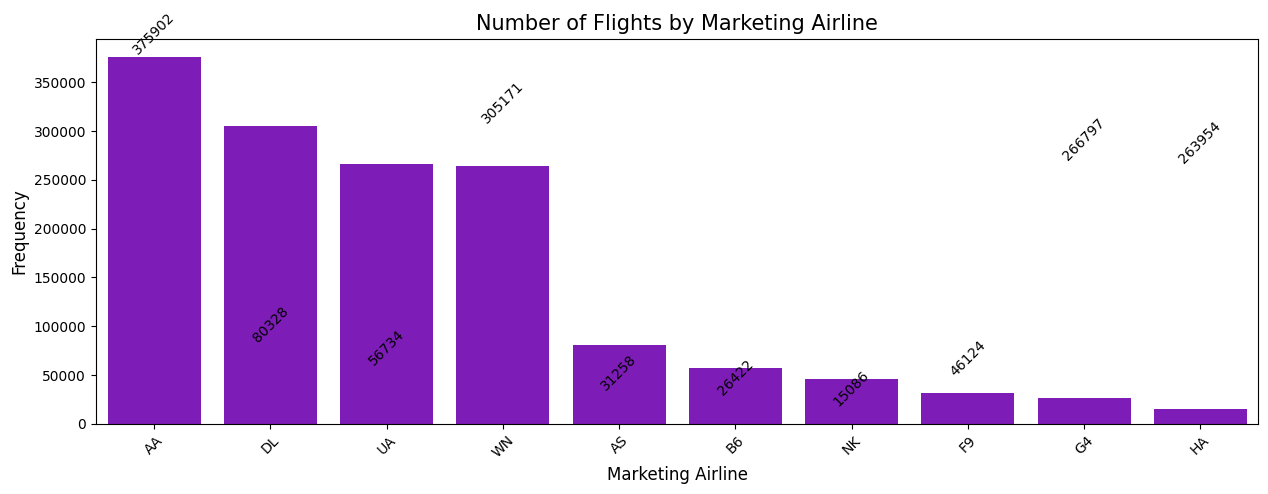

In [ ]:
# two-letter code represents airline code under which the flight was marketed
plot_bar(train['Marketing_Airline'], 'Number of Flights by Marketing Airline', 'Marketing Airline', fontsize=10, rotation=45)

### 3.1.2 | Weekday

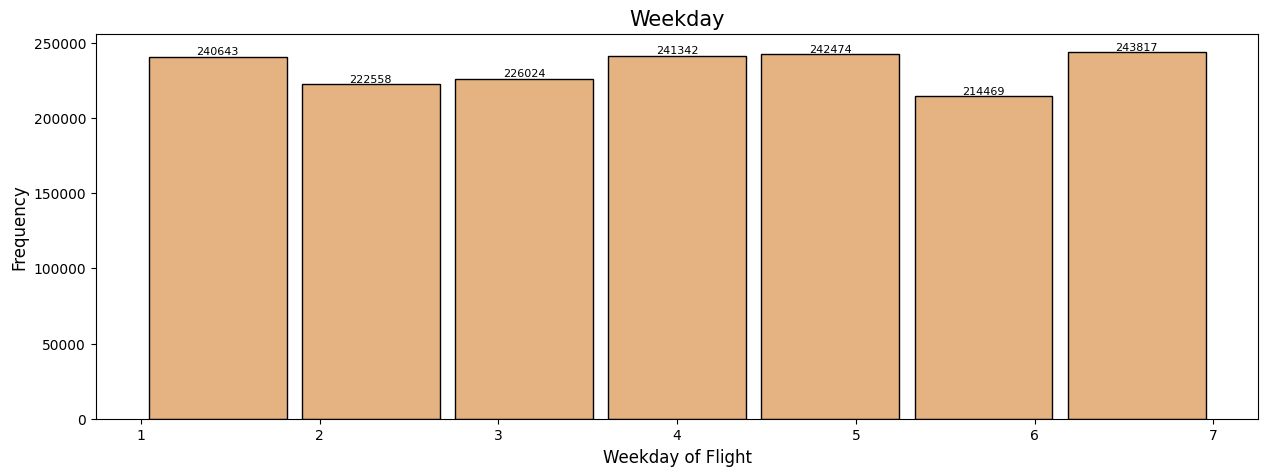

In [ ]:
# The weekday in which the flight occurred, represented by an integer ranging from 1 to 7.
plot_hist(train['Weekday'], bins = 7, title = 'Weekday', xlabel='Weekday of Flight',  color = colors[2], shrink = 0.9)

### 3.1.3 | Month of Year

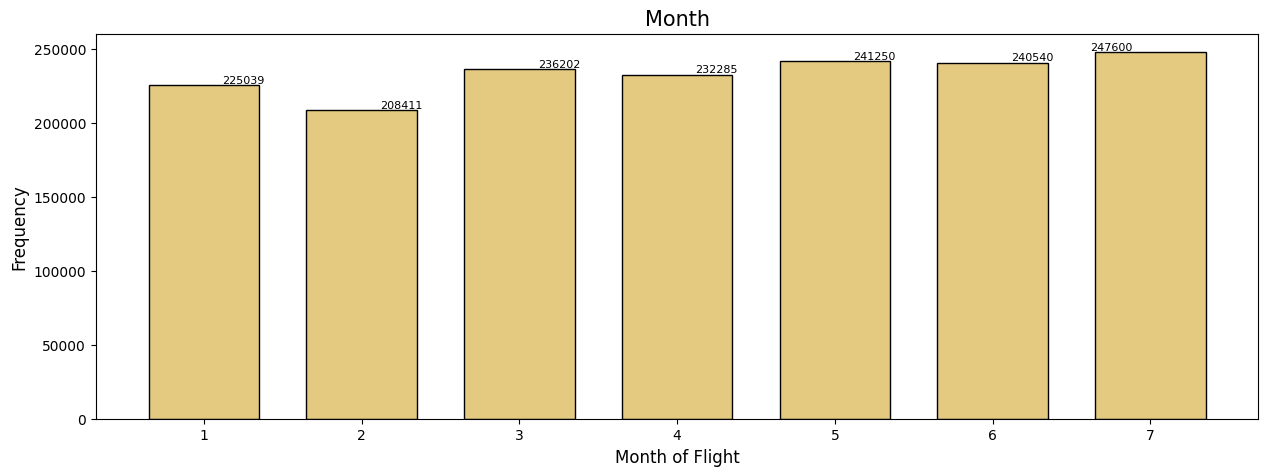

In [ ]:
# The month of the year in which the flight occurred, represented by an integer ranging from 1 (January) to 12 (December).
plot_hist(train['Month_of_Year'], bins = 12, title = 'Month', xlabel = 'Month of Flight', color = colors[3], discrete = True, shrink = 0.7)

The histogram reveals a mostly uniform distribution of flights across the month of year, with slight increases at the middle of the year. These increases due to the spring and summer.

### 3.1.4 | Days of Month

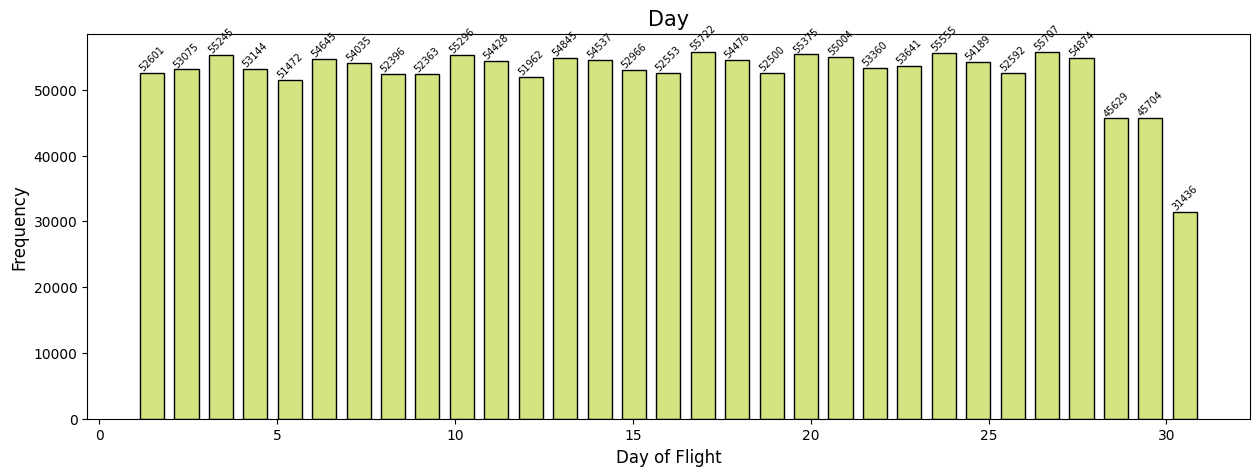

In [ ]:
# The day of the month on which the flight took place, represented by an integer from 1 to 31.
plot_hist(train['Day_of_Month'], bins = 31, title = 'Day', xlabel = 'Day of Flight', fontsize = 7, rotation = 45, color = colors[5], shrink = 0.7)

The histogram reveals a mostly uniform distribution of flights across the days of the month, with slight decreases at the end of the month. These decreases are due to some months having fewer than 31 days.

### 3.1.5 | Scheduled Departure Time

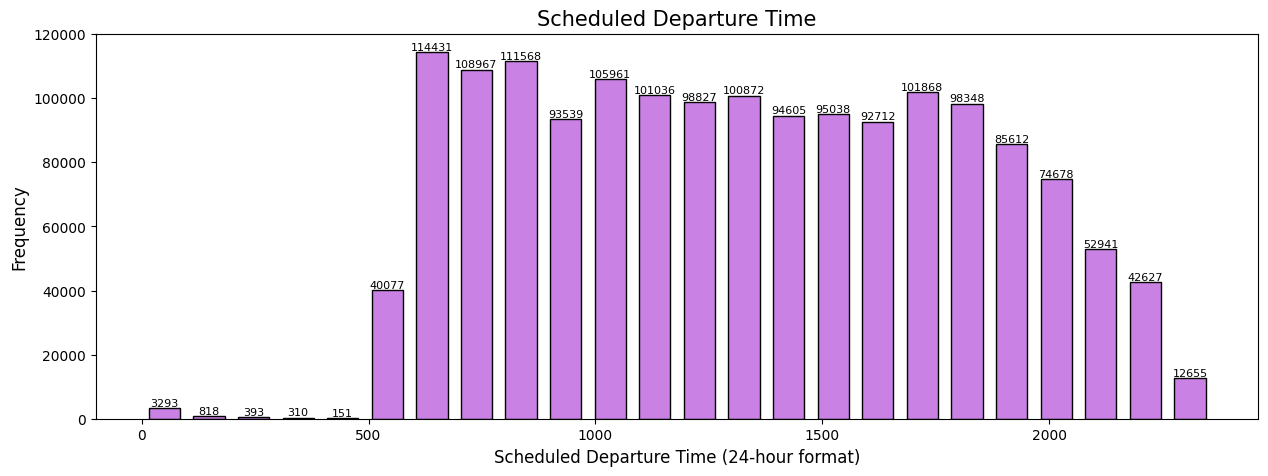

In [ ]:
# departure time 24 hour format
plot_hist(train['Scheduled_Departure_Time'].dropna(), bins=24, title = 'Scheduled Departure Time', xlabel = 'Scheduled Departure Time (24-hour format)',  color = colors[-6], shrink= 0.7)

The histogram shows a bimodal distribution, indicating two peak periods for flight departures. The first peak occurs in the morning around 06:00 to 09:00 hours, and the second peak occurs in the evening around 18:00 hours. There are fewer flights at night from 23:00 to 04:00 hours.

### 3.1.6 | Actual Departure Time

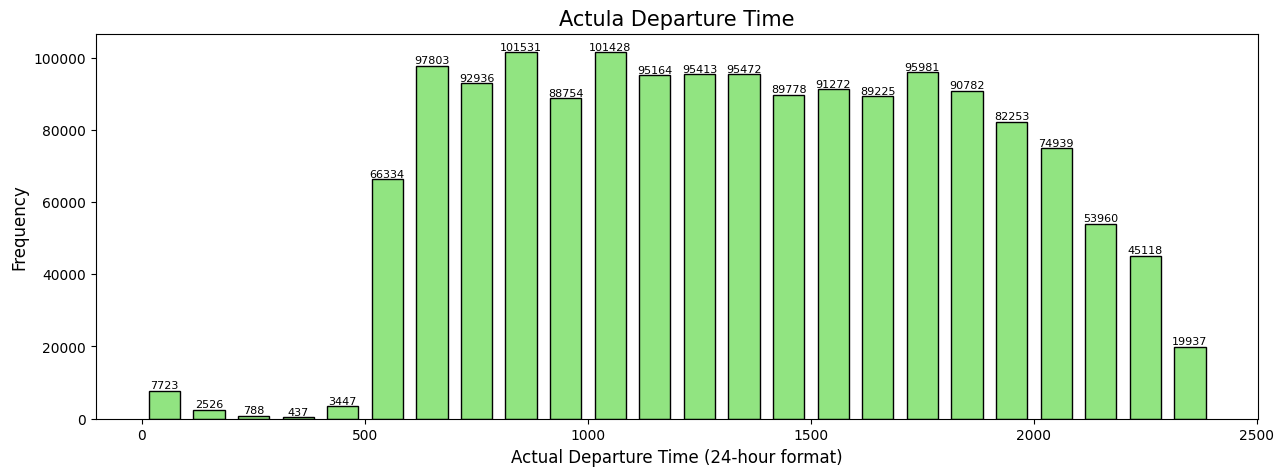

In [ ]:
# actual departure time 24 hour format
plot_hist(train['Actual_Departure_Time'].dropna(), bins=24, title = 'Actula Departure Time', xlabel = 'Actual Departure Time (24-hour format)',  color = colors[8], shrink= 0.7)

This histogram is similar to the departure time histogram. It also shows two peak periods for scheduled flight departures, which are the same as the actual departure times.

### 3.1.7 | Departure Delay

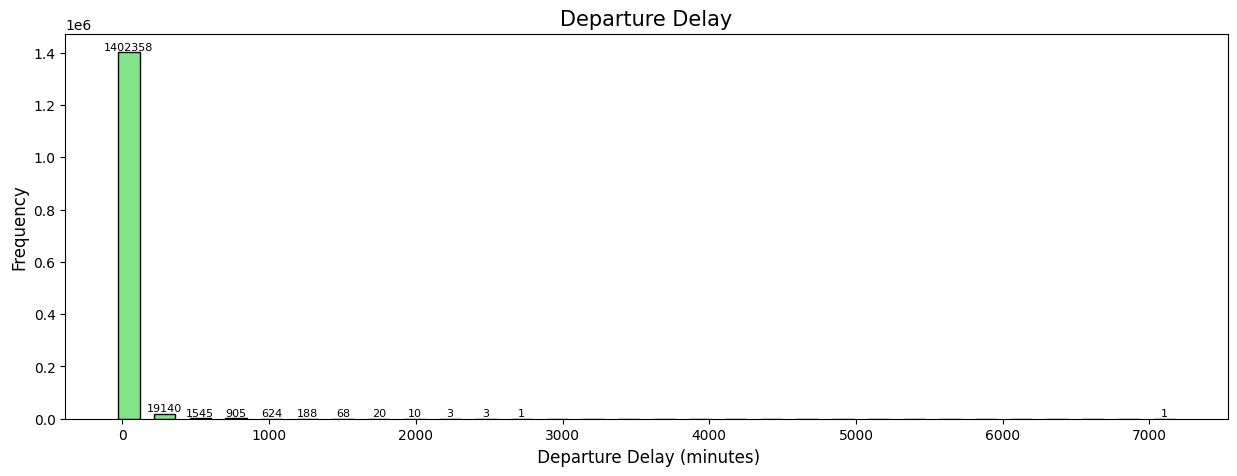

In [ ]:
# The delay in flight departure, calculated as the difference (in minutes) between the actual and scheduled departure times.
# Positive values indicate a delay, while negative values indicate an early departure.

plot_hist(train['Departure_Delay'].dropna(), bins=30, title = 'Departure Delay', xlabel = ' Departure Delay (minutes)',  color = colors[9], shrink= 0.6)

The histogram indicates that most flights depart close to their scheduled departure time, as the peak of the distribution is around zero. However, there are also many flights with departure delays, shown by the long tail to the right of the distribution.

### 3.1.8 | Scheduled Arrival Time

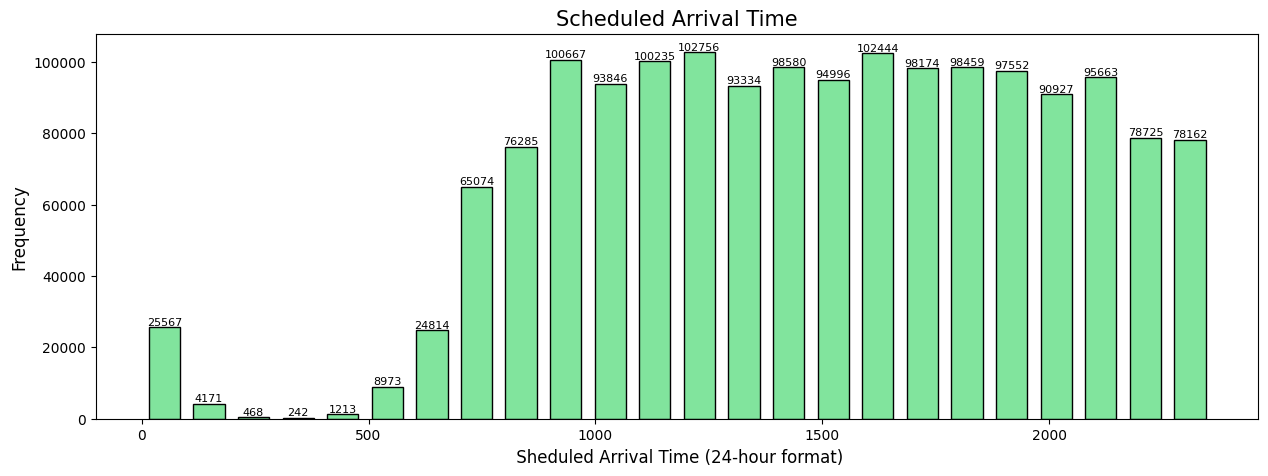

In [ ]:
# arrival time 24 hour format
plot_hist(train['Scheduled_Arrival_Time'].dropna(), bins=24, title = 'Scheduled Arrival Time', xlabel = ' Sheduled Arrival Time (24-hour format)',  color = colors[10], shrink= 0.7)

This histogram is similar to the sheduled departure time histogram. It also shows two peak periods for scheduled flight departures, which are the same as the actual departure times.

### 3.1.9 | Arrival Delay

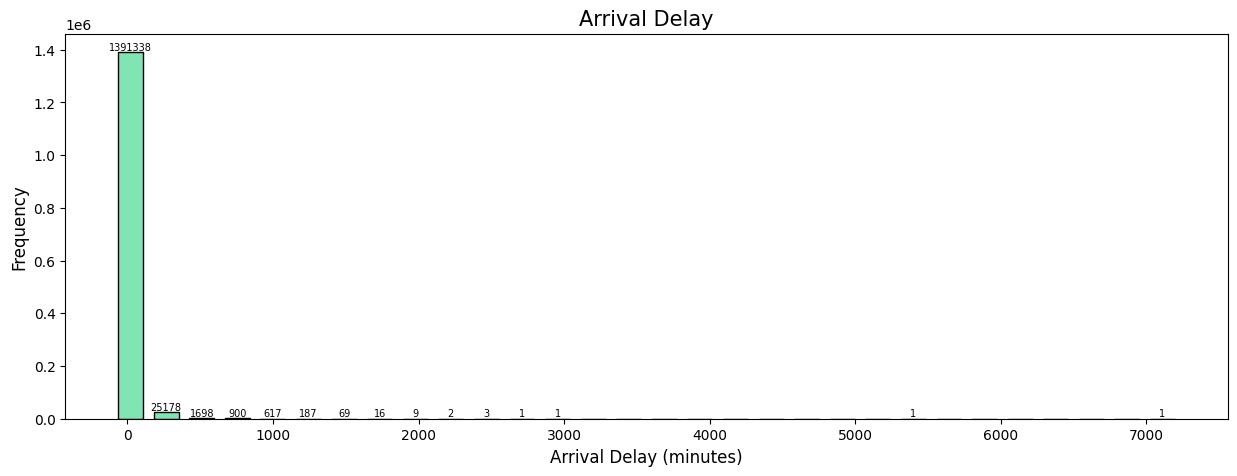

In [ ]:
# The delay in flight arrival, calculated as the difference (in minutes) between the actual and scheduled arrival times.
# Positive values indicate a delay, while negative values indicate an early arrival.
plot_hist(train['Arrival_Delay'].dropna(), bins=30, title = 'Arrival Delay', xlabel = 'Arrival Delay (minutes)', fontsize=7, color = colors[11], shrink = 0.7)

The histogram shows that most flights arrive close to their scheduled arrival time, as the peak of the distribution is around zero. However, there are also many flights with arrival delays, shown by the long tail to the right of the distribution.

### 3.1.10 | Marketing_Airline_DOT_ID

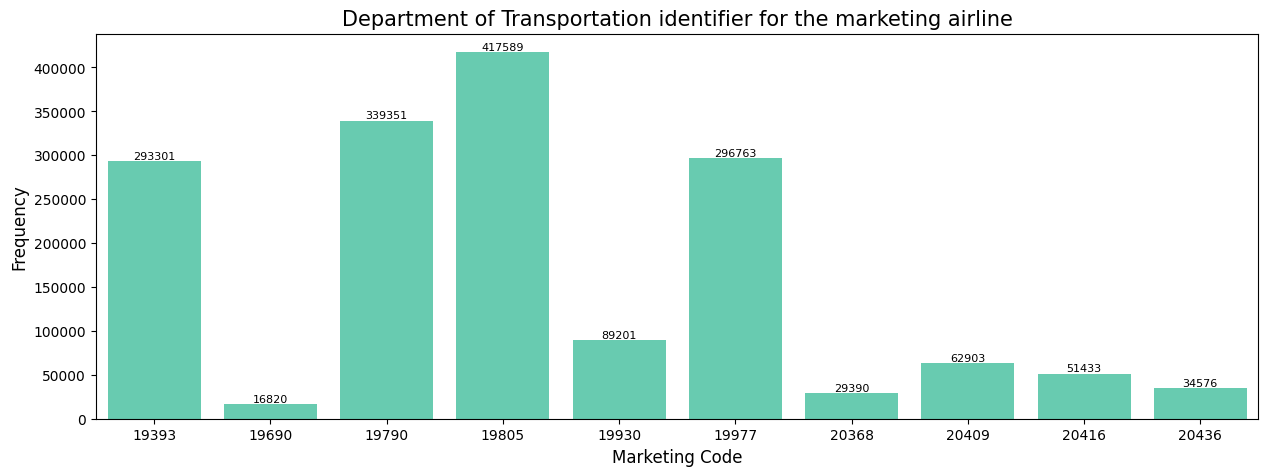

In [ ]:
# Department of Transportation identifier for the marketing airline.

plot_bar(train['Marketing_Airline_DOT_ID'], 'Department of Transportation identifier for the marketing airline', 'Marketing Code', color = colors[12])

The bar plot shows that the Department with the codes 19805, 19790, 19977 and 19393 operate the most flights in this dataset

### 3.1.11 | Origin Airport ID

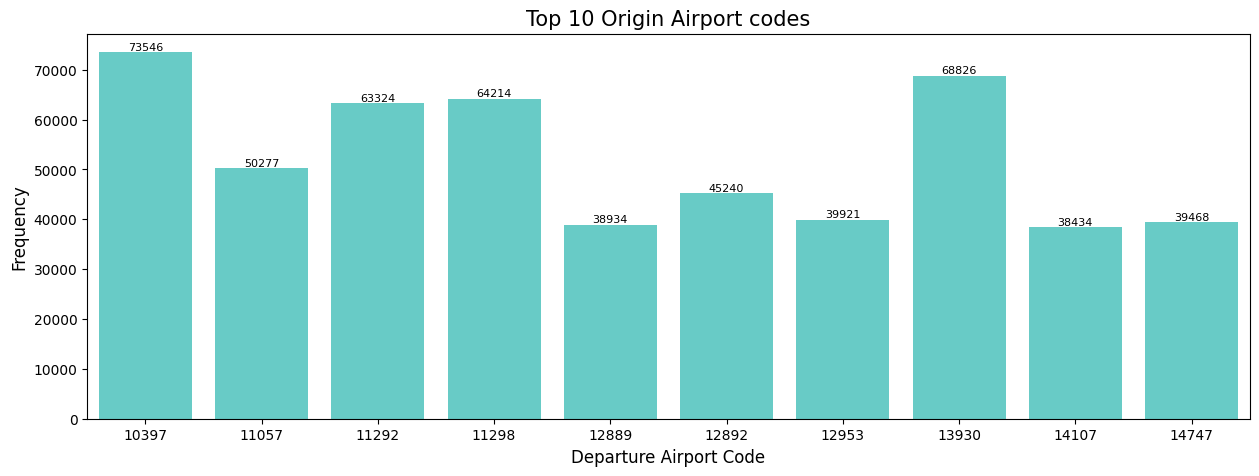

In [ ]:
# A 5 number code signifying the airport from which the flight departed.
plot_bar(train.Origin_Airport_ID, 'Top 10 Origin Airport codes', 'Departure Airport Code', color = colors[13], top_10 = True)

The bar plot shows top 10 Origin Airport codes that flights took off. 10397, 13930 origin Airport codes are the most common airports in the dataset

### 3.1.12 | Flight_Number


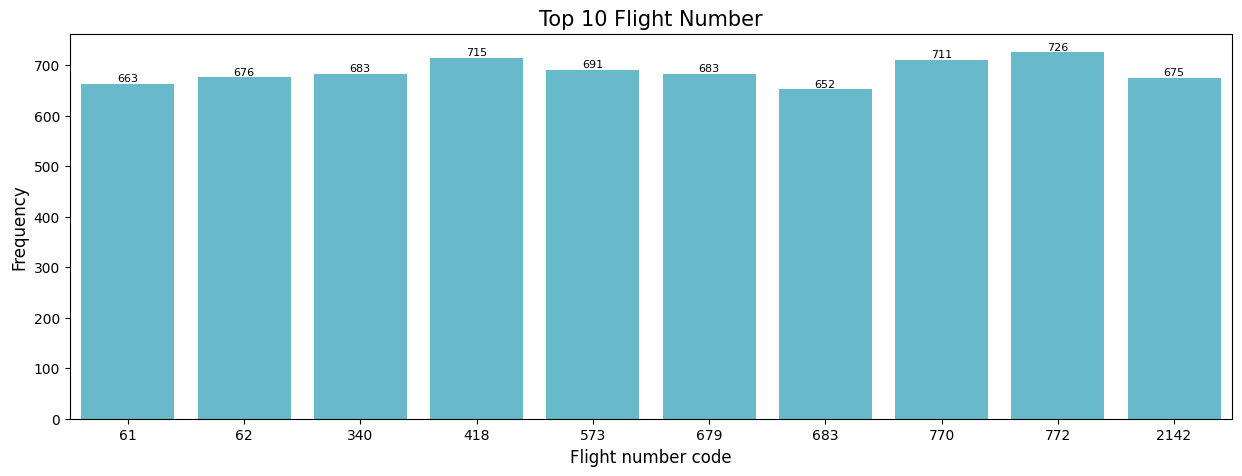

In [ ]:
 # The number assigned to the flight by the operating airline.
 plot_bar(train.Flight_Number, 'Top 10 Flight Number', 'Flight number code', color = colors[14], top_10 = True)

### 3.1.13 | Taxi Out Time

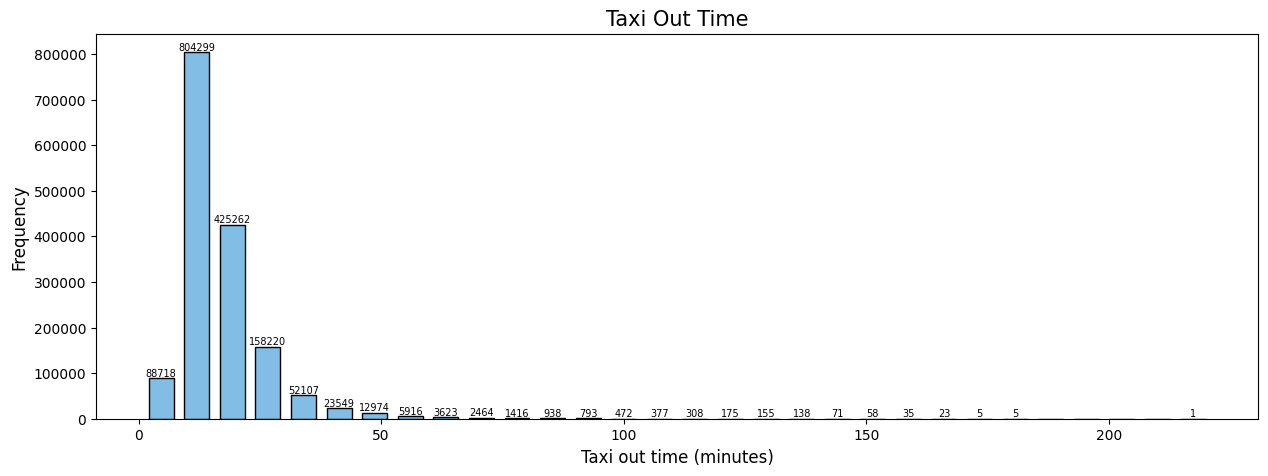

In [ ]:
# Taxi Time Out  - Time in Minutes form gate departure to until Takeoff
plot_hist(train['Taxi_Out_Time'].dropna(), bins=30, title = 'Taxi Out Time', xlabel = 'Taxi out time (minutes)', fontsize=7, color = colors[15], shrink = 0.7)

Taxi Out Time represents minutes from the date departure to until takeoff 20 and 30 minutes are the most frequent, while there is long right tail.

### 3.1.14 | Taxi In Time

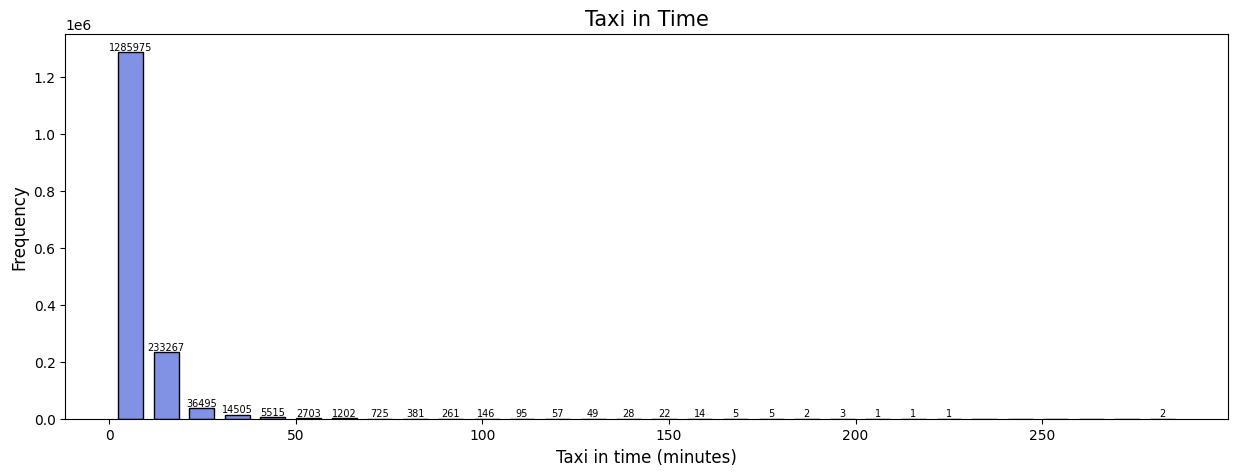

In [ ]:
# Taxi_In_Time – Time in minutes from landing to gate arrival.

plot_hist(train['Taxi_In_Time'].dropna(), bins=30, title = 'Taxi in Time', xlabel = 'Taxi in time (minutes)', fontsize=7, color = colors[17], shrink = 0.7)

Taxi In Time column represents the time duration, in minutes, spent by an aircraft taxiing from the runway after landing to reaching the arrival gate. In the above graph shows that people spend 10 minutes to reach the arrival gate, however, there is the long right tail means people have to wait after landing

### 3.1.15 | Flight Duration

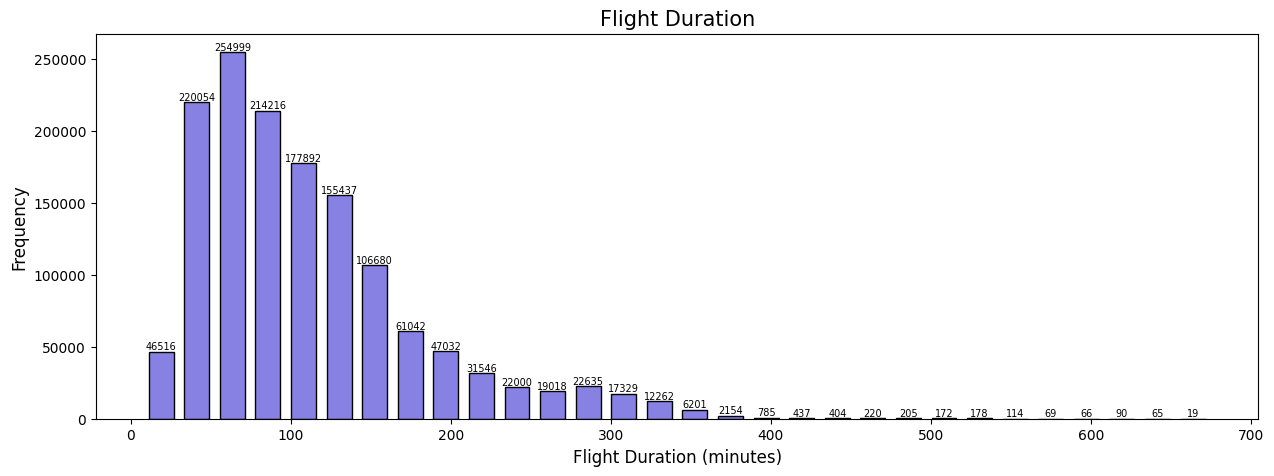

In [ ]:
# The duration of the flight, measured in minutes.
plot_hist(train['Flight_Duration'].dropna(), bins=30, title='Flight Duration', xlabel='Flight Duration (minutes)', fontsize=7, color = colors[18], shrink = 0.7)

The histogram shows that most flights have an air time of around 20 to 200 minutes, with a few flights having significantly longer air times.

### 3.1.16 | Flight Distance

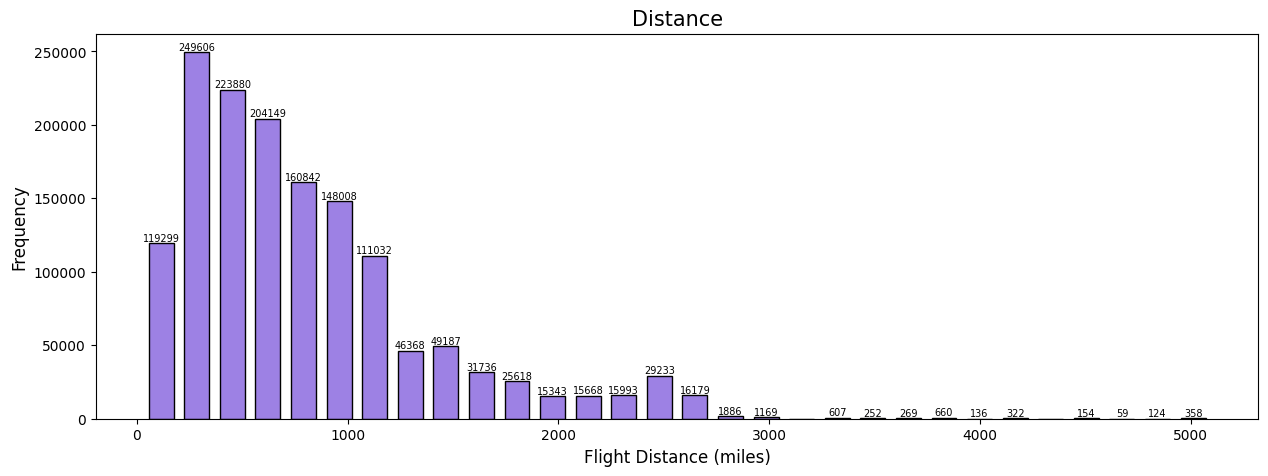

In [ ]:
# The total distance (in miles) between the origin and destination airports.
plot_hist(train.Flight_Distance, bins=30, title='Distance', xlabel='Flight Distance (miles)', fontsize=7, color = colors[19], shrink = 0.7)

The histogram shows that most flights travel a distance of around 500 to 1000 miles, with a few flights traveling significantly longer distances.

### 3.1.17 | Temperature | Wind Speed | Precipitation

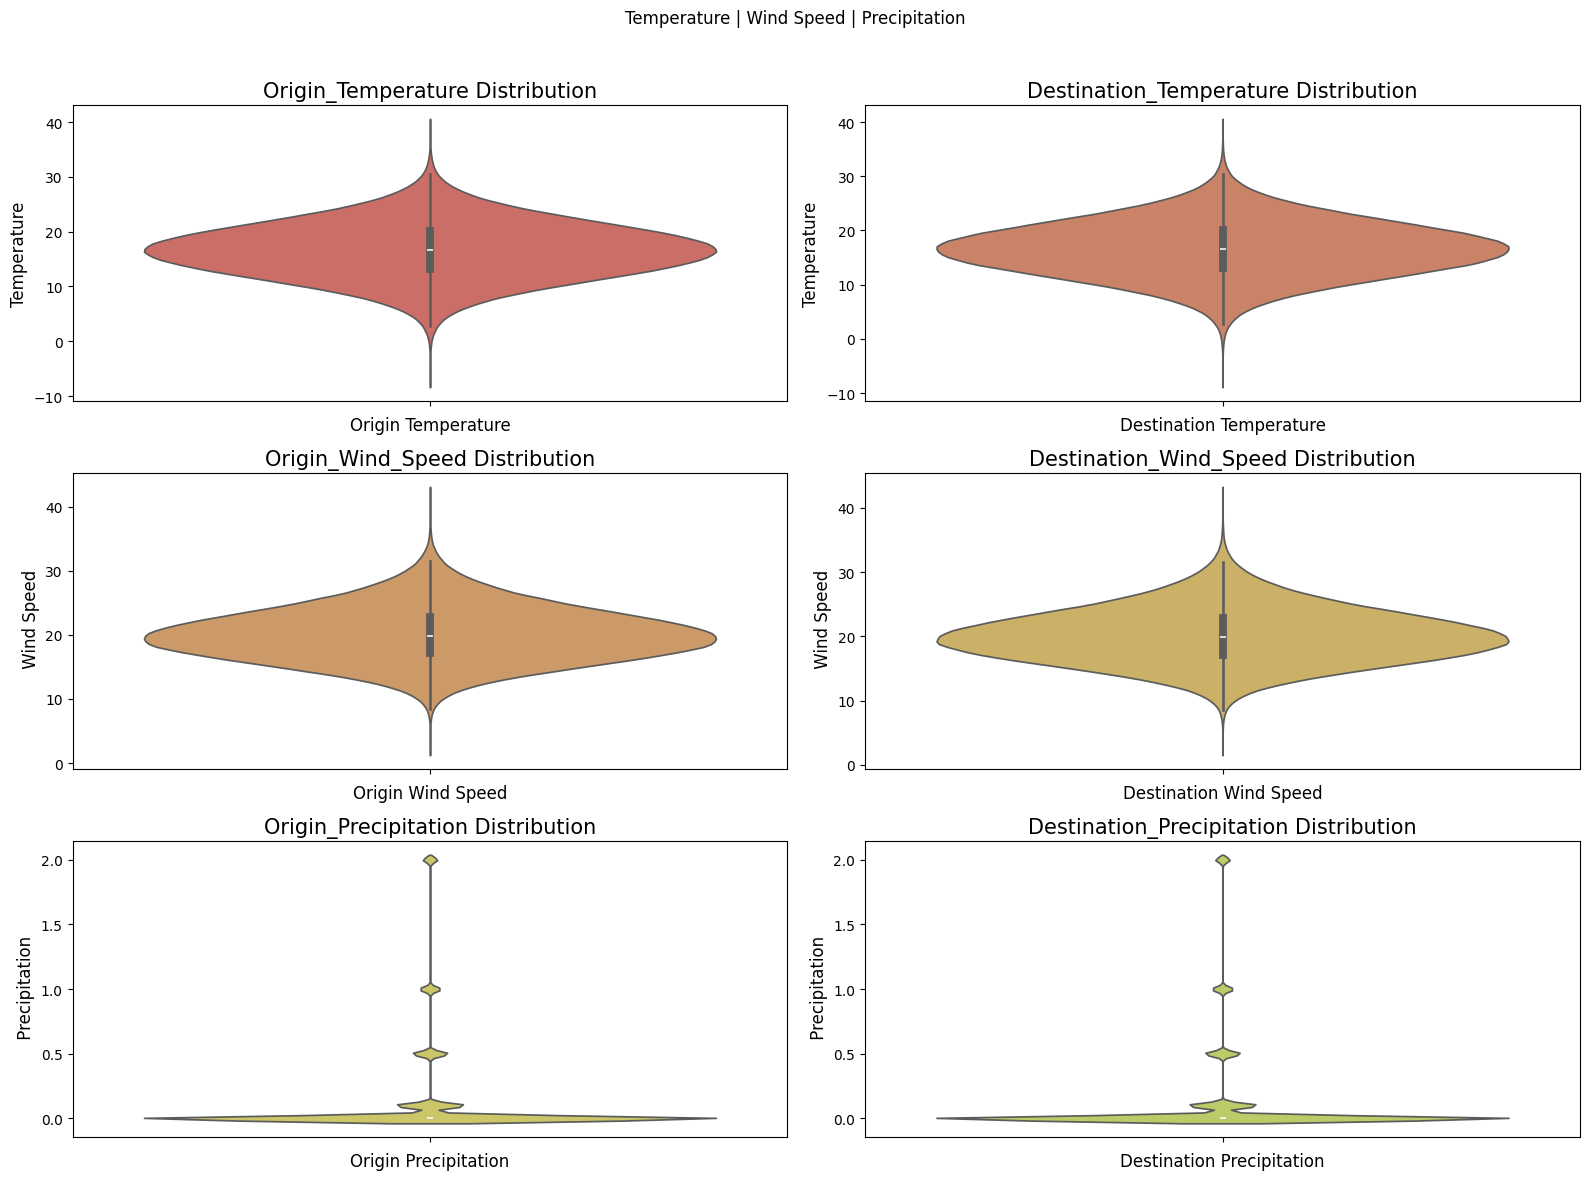

In [ ]:
# Function to create violin plot
def create_violin_plot(data, column, title,  ylabel, color):
    plt.figure(figsize=(10, 6))
    fig = sns.violinplot(data=data[column], color = color)
    plt.title(title, fontsize=15)
    plt.xlabel(column.replace('_', ' ').title(), fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.show()


weather_columns = ['Origin_Temperature', 'Destination_Temperature', 'Origin_Wind_Speed', 'Destination_Wind_Speed', 'Origin_Precipitation', 'Destination_Precipitation']
ylabel = ['Temperature', 'Temperature', ' Wind Speed', ' Wind Speed', ' Precipitation', ' Precipitation']
# Create a 2x3 subplot
fig, axes = plt.subplots(3, 2, figsize = (16, 12))
fig.suptitle('Temperature | Wind Speed | Precipitation')

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each weather feature
for i, col in enumerate(weather_columns):
    sns.violinplot(data=train[col], color=mcolors.to_hex(colors[i]), ax=axes[i])
    axes[i].set_title(col + ' Distribution', fontsize=15)
    axes[i].set_xlabel(col.replace('_', ' ').title(), fontsize=12)
    axes[i].set_ylabel(ylabel[i], fontsize=12)
    axes[i].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### 3.1.18 | States

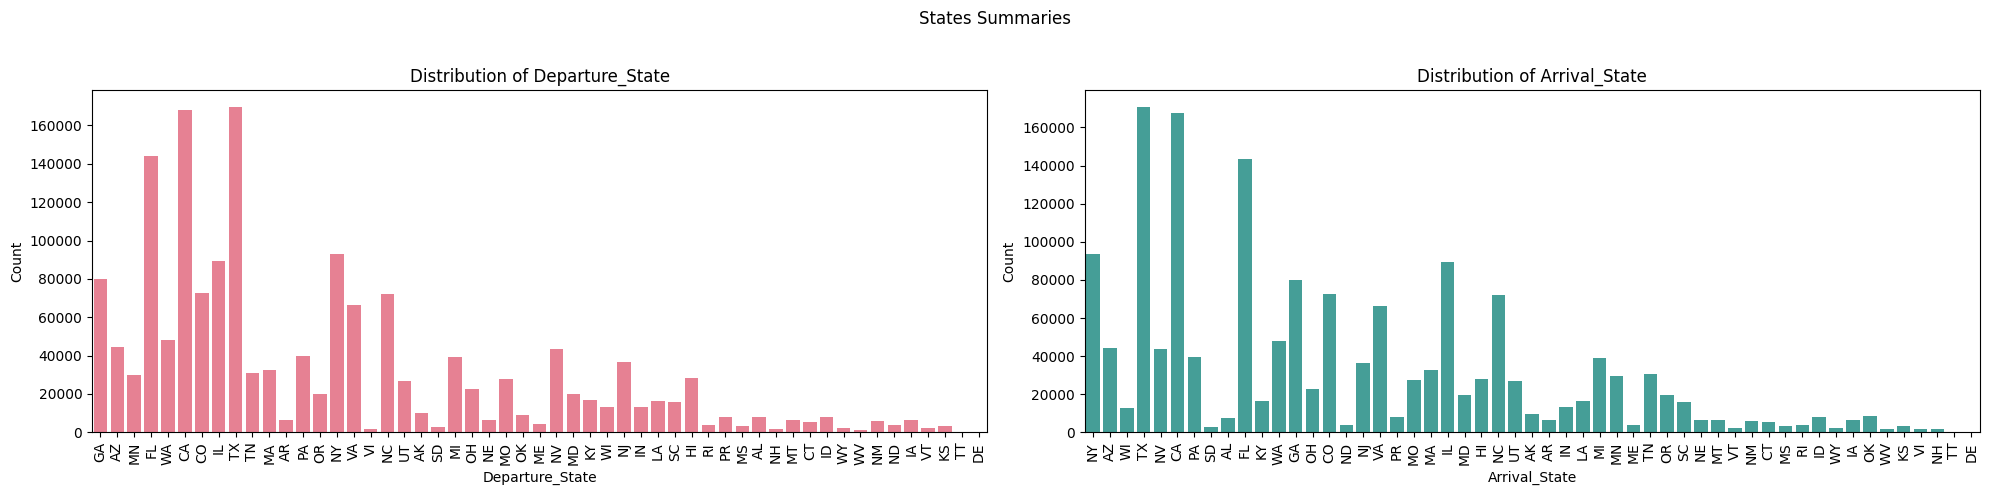

In [ ]:
states = ['Departure_State', 'Arrival_State']

# Create a 2x3 subplot
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('States Summaries')

# Define a color palette
colors = sns.color_palette("husl", len(states))

# flatten the axes array for easy iteration
axes = axes.flatten()

# plot each category
for i, col in enumerate(states):
    sns.countplot(data=train, x=col, ax=axes[i], palette=[colors[i]])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=90)

# adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # adjust rect to fit the suptitle
plt.show()

## 3.2 | Time Series Plots

### Flights distribution based of Departure and Arrival time

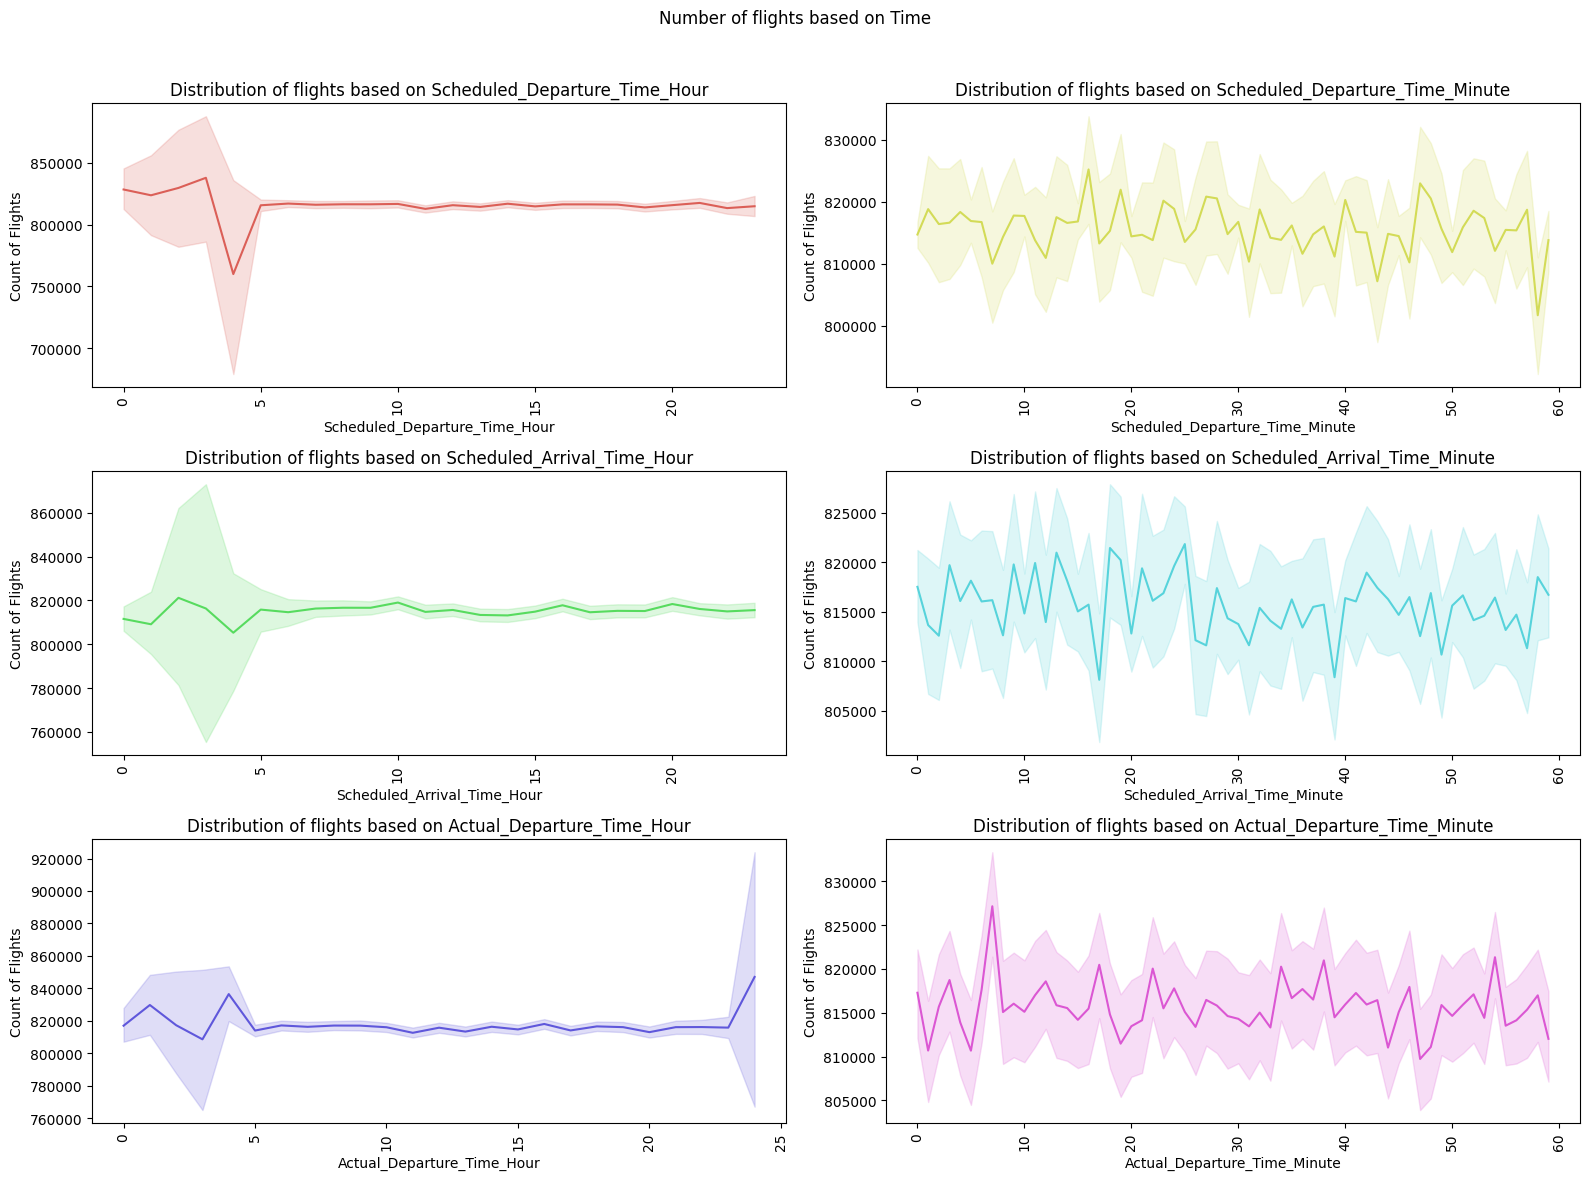

In [ ]:
# number of flights based on time
time_columns = ['Scheduled_Departure_Time_Hour', 'Scheduled_Departure_Time_Minute', 'Scheduled_Arrival_Time_Hour', 'Scheduled_Arrival_Time_Minute', 'Actual_Departure_Time_Hour', 'Actual_Departure_Time_Minute']

# Create a 2x3 subplot
fig, axes = plt.subplots(3, 2, figsize = (16, 12))
fig.suptitle('Number of flights based on Time')

# Define a color palette
colors = sns.color_palette("hls", len(time_columns))

# flatten the axes array for easy iteration
axes = axes.flatten()

# plot each time features
for i, col in enumerate(time_columns):
    sns.lineplot(data = train, y = train.index, x = col, ax=axes[i], color = mcolors.to_hex(colors[i]))
    axes[i].set_title(f'Distribution of flights based on {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count of Flights')
    axes[i].tick_params(axis='x', rotation=90)

# adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 3.3 | Bivariate Analysis

### 3.3.1 | Arrival Delay vs Month of Year

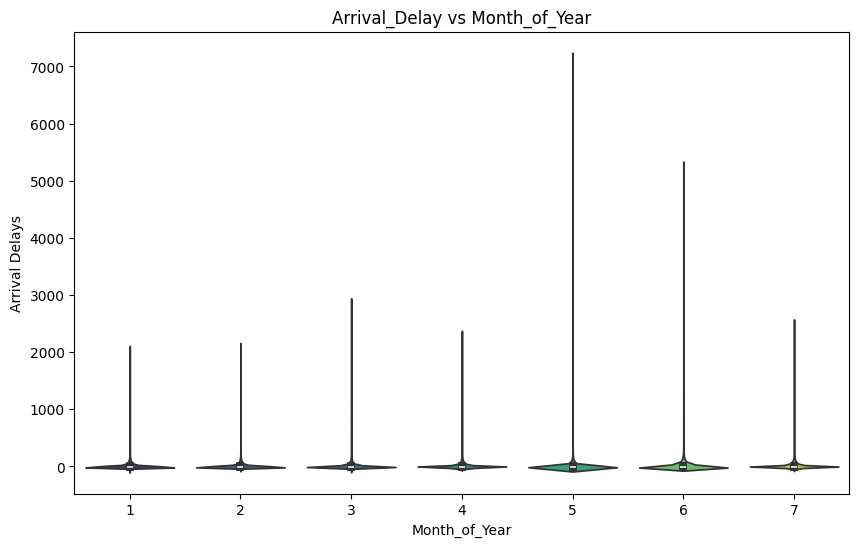

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define color palette for scatter plots
colors_scatter = 'husl'

# Define color palette for violin plots
colors_box = 'viridis'

# Define the function to create scatter plots using Seaborn
def plot_scatter(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, hue=y, palette=colors_scatter)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title=ylabel)
    plt.show()

# Define the function to create violin plots using Seaborn
def plot_violin(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=x, y=y, palette=colors_box)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


plot_violin(train['Month_of_Year'], train['Arrival_Delay'], title='Arrival_Delay vs Month_of_Year', xlabel='Month_of_Year', ylabel='Arrival Delays')

### 3.3.2 | Arrival Delay vs Weekdyas

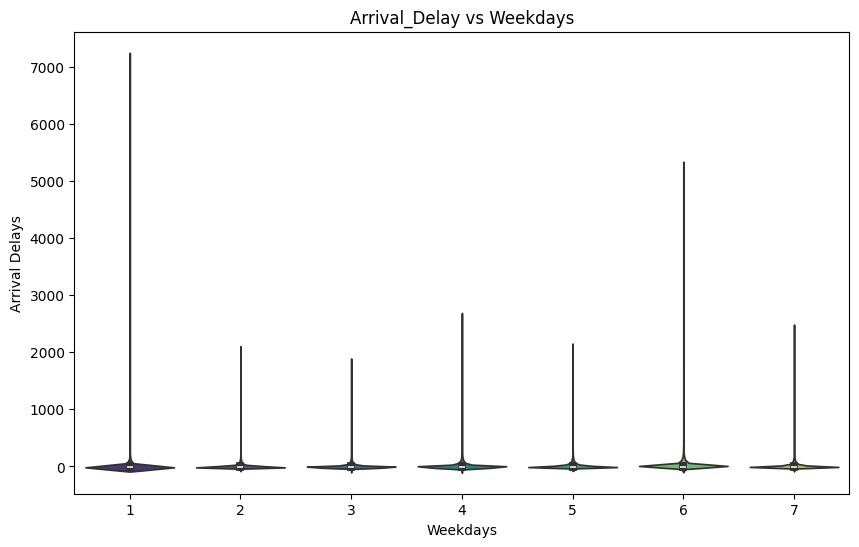

In [ ]:
plot_violin(train['Weekday'], train['Arrival_Delay'], title='Arrival_Delay vs Weekdays', xlabel='Weekdays', ylabel='Arrival Delays')

### 3.3.3 | Arrival Delay vs Days

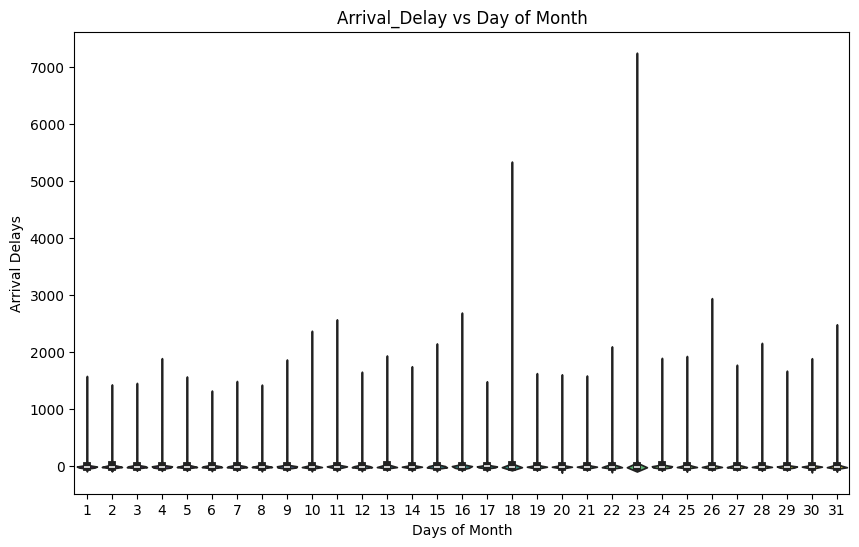

In [ ]:
plot_violin(train['Day_of_Month'], train['Arrival_Delay'], title='Arrival_Delay vs Day of Month', xlabel='Days of Month', ylabel='Arrival Delays')

### 3.3.4 | Arrival Delay vs Scheduled_Departure_Time

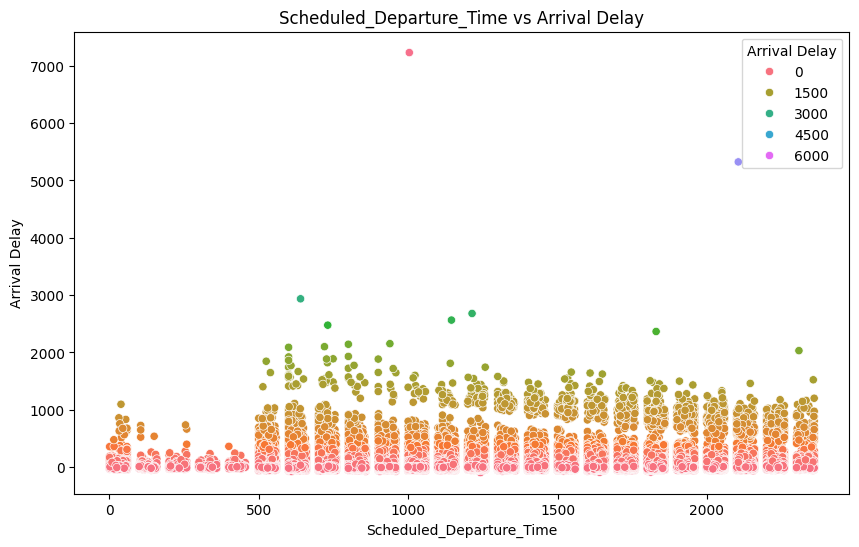

In [ ]:
# dep_time vs arr_delay
plot_scatter(train['Scheduled_Departure_Time'], train['Arrival_Delay'], 'Scheduled_Departure_Time vs Arrival Delay', 'Scheduled_Departure_Time', 'Arrival Delay')

### 3.3.6 | Arrival Delay vs Scheduled_Arrival_Time

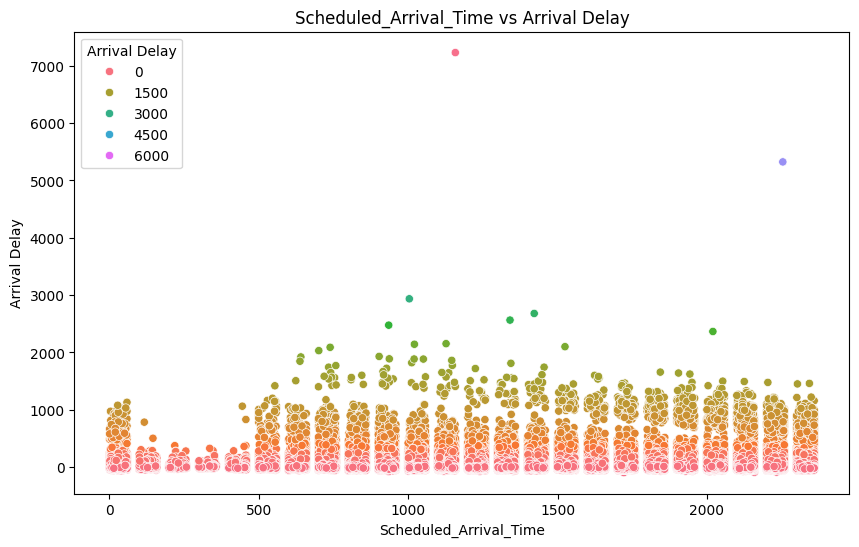

In [ ]:
# dep_time vs arr_delay
plot_scatter(train['Scheduled_Arrival_Time'], train['Arrival_Delay'], 'Scheduled_Arrival_Time vs Arrival Delay', 'Scheduled_Arrival_Time', 'Arrival Delay')

### 3.3.7 | Arrival Delay vs Departure_Delay

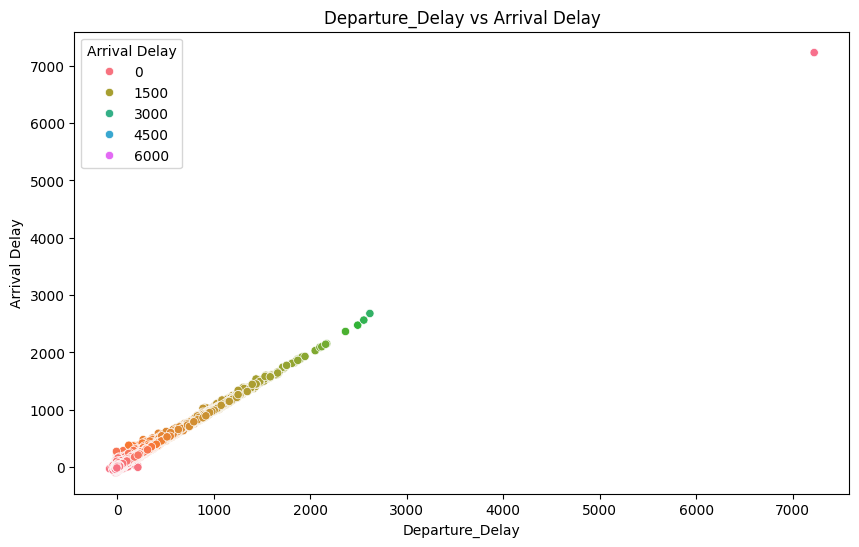

In [ ]:
# dep_time vs arr_delay
plot_scatter(train['Departure_Delay'], train['Arrival_Delay'], 'Departure_Delay vs Arrival Delay', 'Departure_Delay', 'Arrival Delay')

### 3.3.8 | Arrival Delay vs Distance

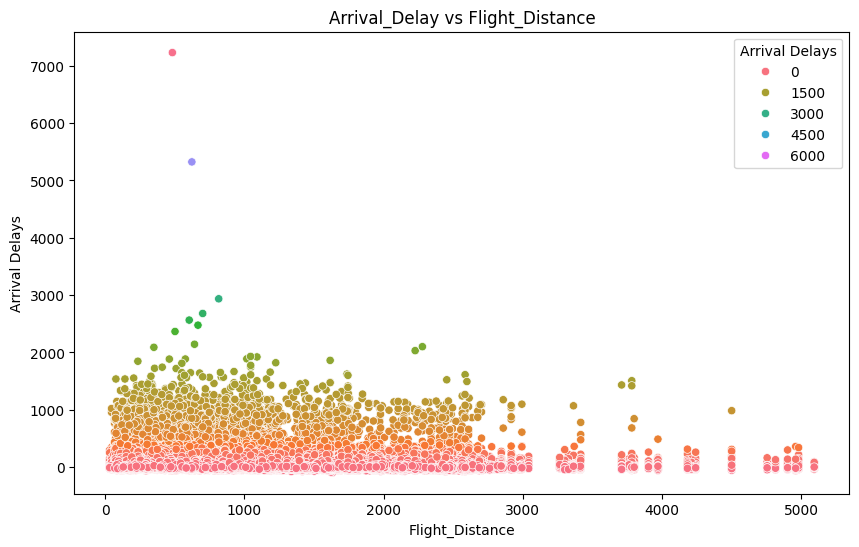

In [ ]:
plot_scatter(train['Flight_Distance'], train['Arrival_Delay'], title='Arrival_Delay vs Flight_Distance', xlabel='Flight_Distance', ylabel='Arrival Delays')

### 3.3.9 | Arrival Delay vs Duration

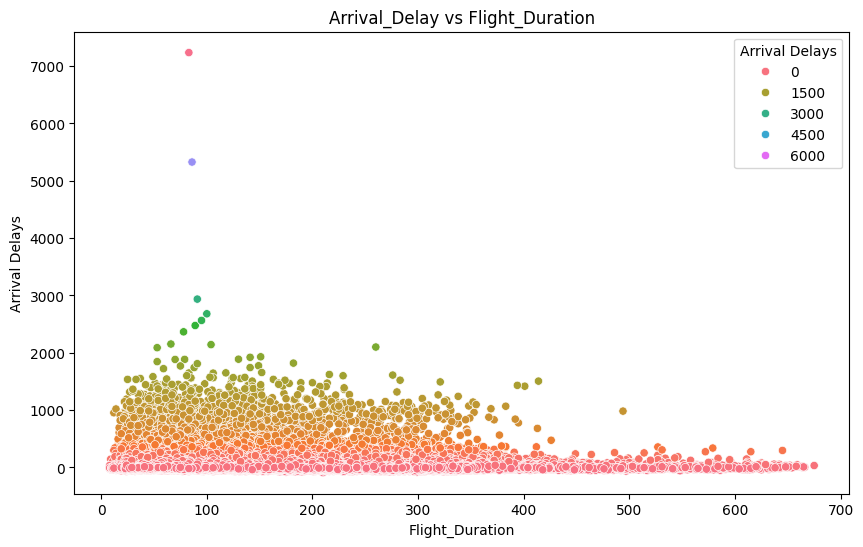

In [ ]:
plot_scatter(train['Flight_Duration'], train['Arrival_Delay'], title='Arrival_Delay vs Flight_Duration', xlabel='Flight_Duration', ylabel='Arrival Delays')

### 3.3.10 Arrival Delay vs Temperature

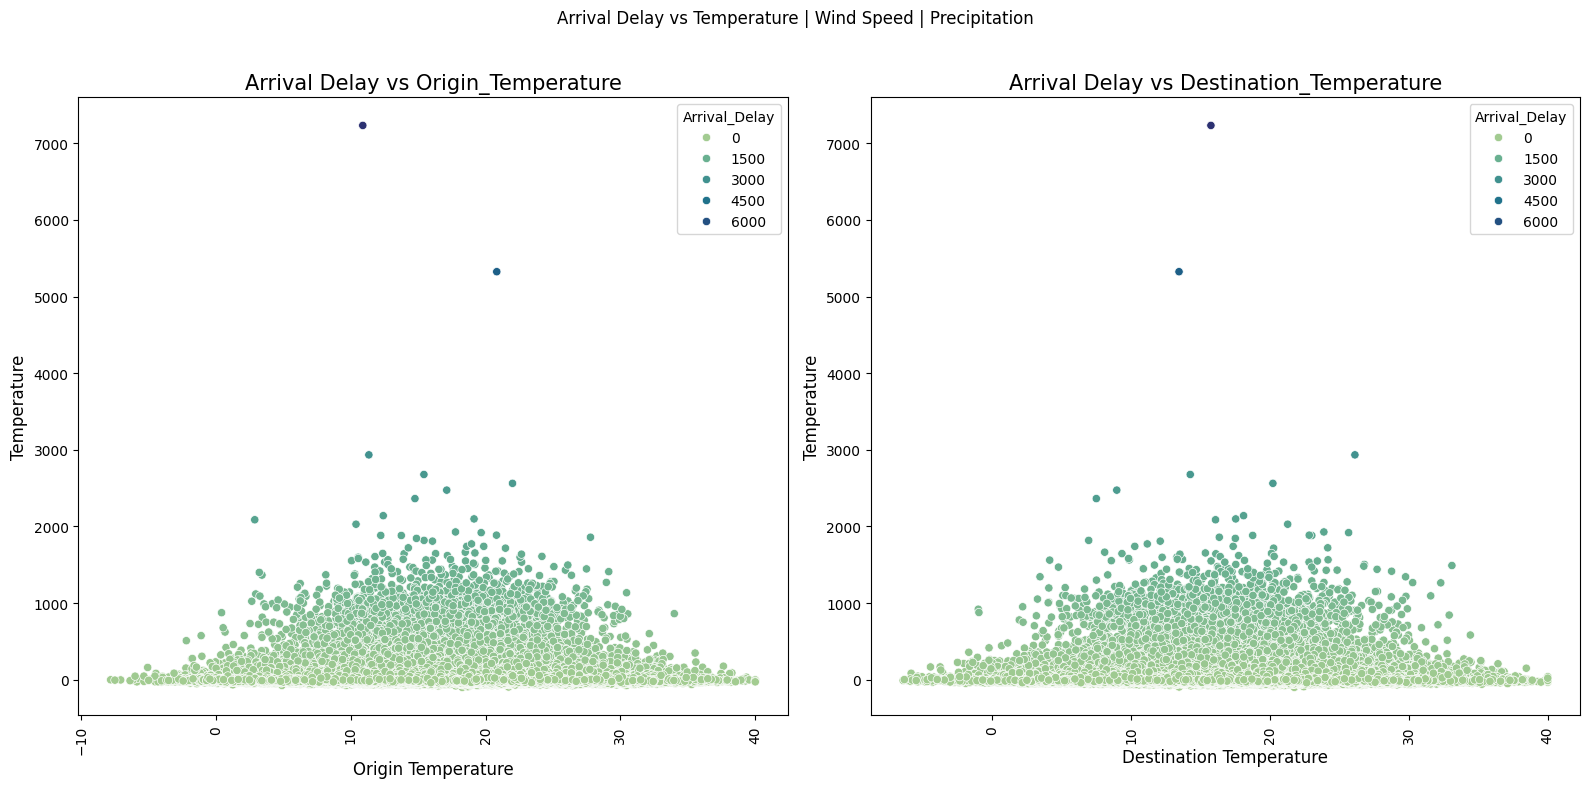

In [ ]:
weather_columns = ['Origin_Temperature', 'Destination_Temperature']
ylabel = ['Arrival Delay', 'Arrival Delay']
# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize = (16, 8))
fig.suptitle('Arrival Delay vs Temperature')

# Flatten the axes array for easy iteration
axes = axes.flatten()
color_weather = 'crest'
# Plot each weather feature
for i, col in enumerate(weather_columns):
    sns.scatterplot(data = train, x=col, y= 'Arrival_Delay', hue = "Arrival_Delay", palette = color_weather, ax = axes[i])
    axes[i].set_title('Arrival Delay' + ' vs ' + col, fontsize=15)
    axes[i].set_xlabel(col.replace('_', ' ').title(), fontsize=12)
    axes[i].set_ylabel(ylabel[i], fontsize=12)
    axes[i].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


The graphs illustrate the correlation between Arrival Delay and both Origin Temperature (temperature at the departure state) and Destination Temperature (temperature at the arrival state). The main range of Arrival Delays is between 0 and 30 minutes for both temperatures. Outliers are present in both graphs, and these will be addressed in the Feature Engineering section.

### 3.3.11 Arrival Delay vs Wind Speed

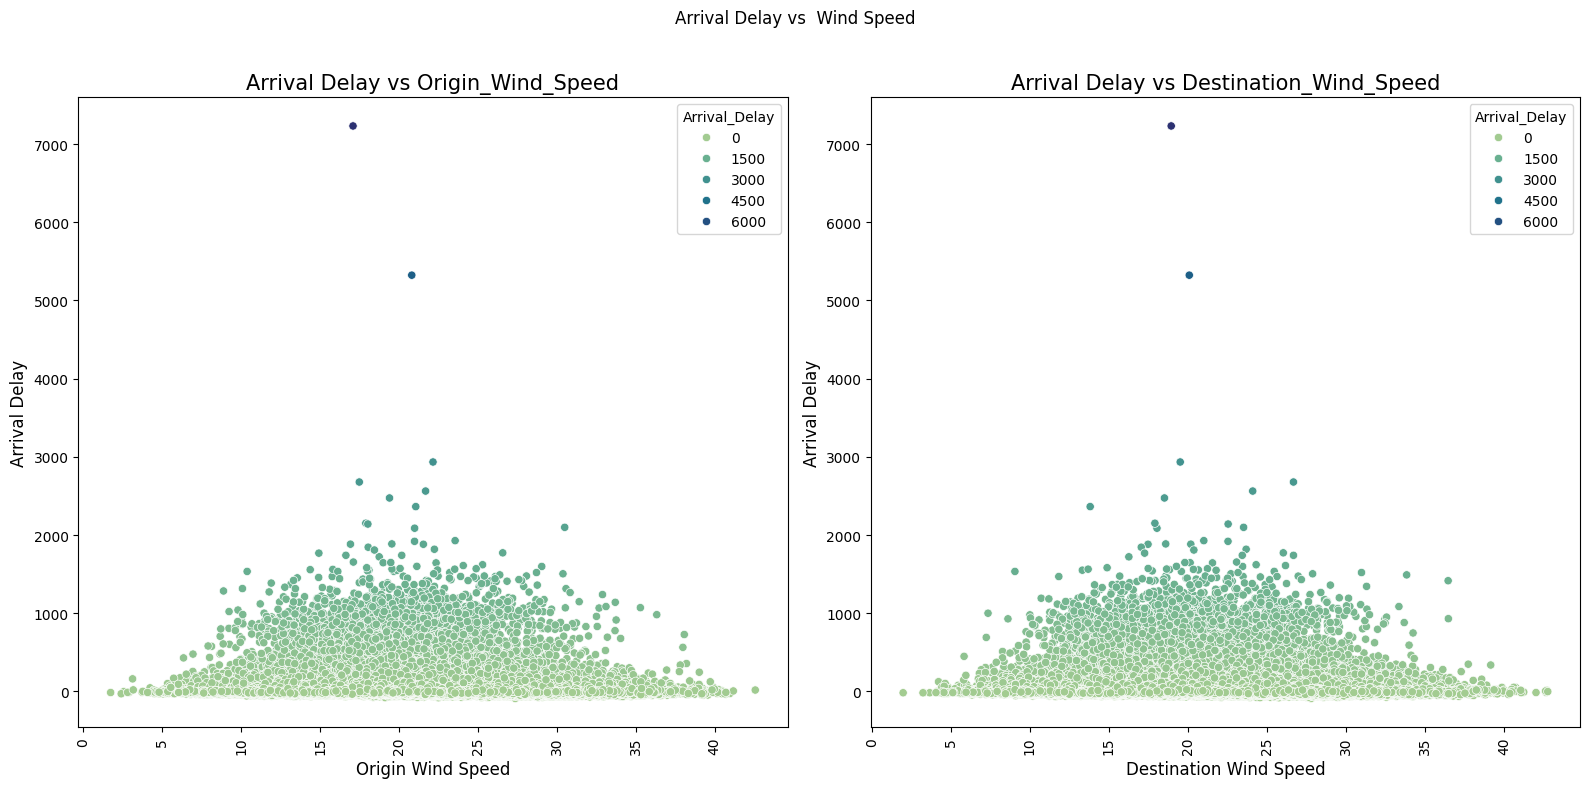

In [ ]:
weather_columns = [ 'Origin_Wind_Speed', 'Destination_Wind_Speed']
ylabel = 'Arrival Delay'
# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize = (16, 8))
fig.suptitle('Arrival Delay vs  Wind Speed')

# Flatten the axes array for easy iteration
axes = axes.flatten()
color_weather = 'crest'
# Plot each weather feature
for i, col in enumerate(weather_columns):
    sns.scatterplot(data = train, x=col, y= 'Arrival_Delay', hue = "Arrival_Delay", palette = color_weather, ax = axes[i])
    axes[i].set_title('Arrival Delay' + ' vs ' + col, fontsize=15)
    axes[i].set_xlabel(col.replace('_', ' ').title(), fontsize=12)
    axes[i].set_ylabel(ylabel, fontsize=12)
    axes[i].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


The Wind Speed vs Arrival Delay scatter plots show that most flight delays occur when wind speed ranges from 10 to 30 mph. Additionally, there are observations of strong wind speeds at 40 miles per hour and slightly higher.

### 3.3.12 Arrival Delay vs Precipitation

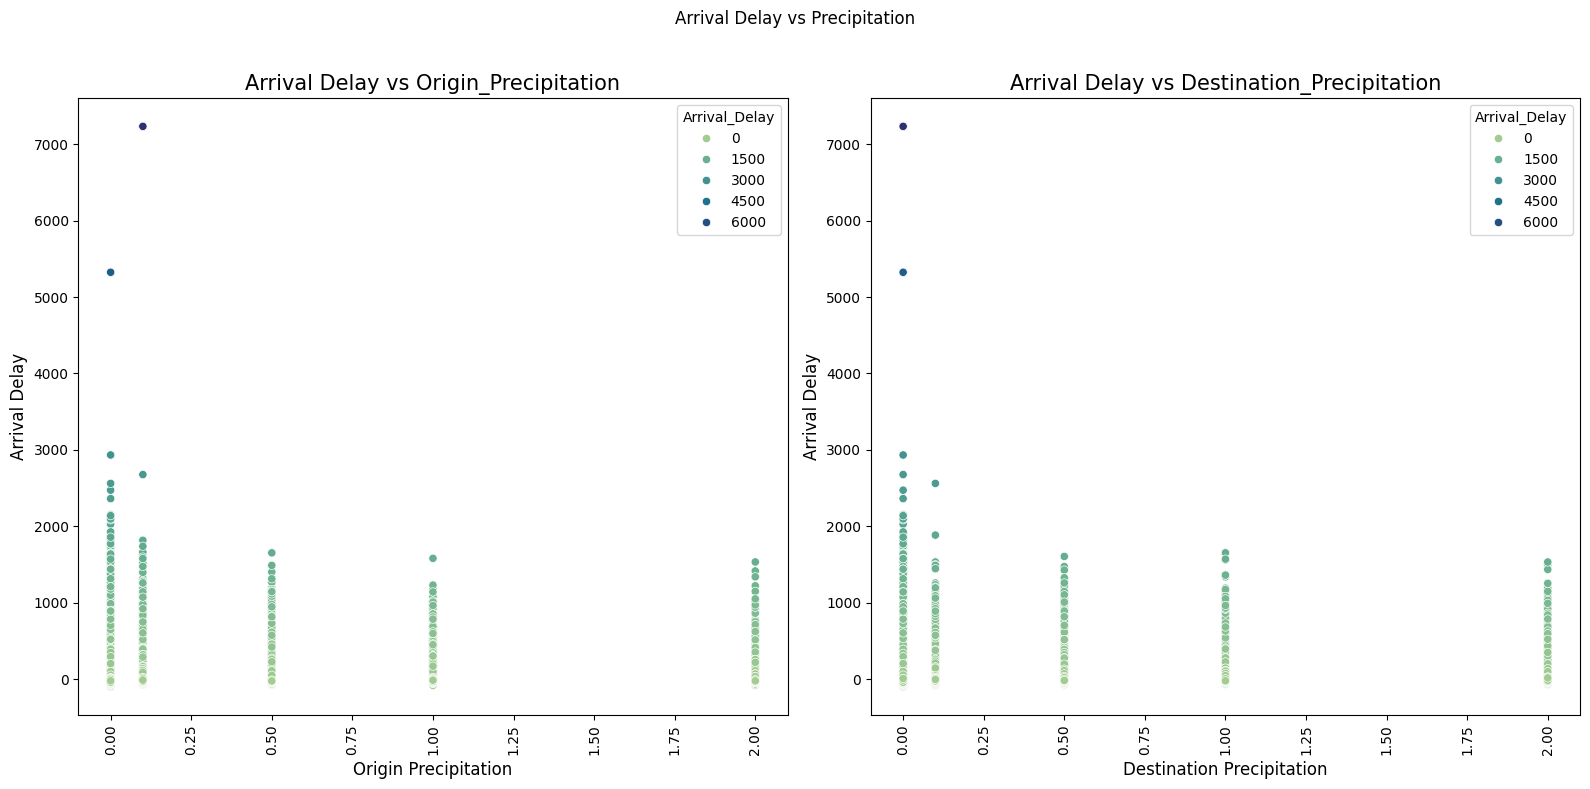

In [ ]:
weather_columns = ['Origin_Precipitation', 'Destination_Precipitation']
ylabel = 'Arrival Delay'
# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize = (16, 8))
fig.suptitle('Arrival Delay vs Precipitation')

# Flatten the axes array for easy iteration
axes = axes.flatten()
color_weather = 'crest'
# Plot each weather feature
for i, col in enumerate(weather_columns):
    sns.scatterplot(data = train, x=col, y= 'Arrival_Delay', hue = "Arrival_Delay", palette = color_weather, ax = axes[i])
    axes[i].set_title('Arrival Delay' + ' vs ' + col, fontsize=15)
    axes[i].set_xlabel(col.replace('_', ' ').title(), fontsize=12)
    axes[i].set_ylabel(ylabel, fontsize=12)
    axes[i].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


The Precipitation variables, given as float types ranging between 0 and 2 with 0.25 steps, indicate common flight delays occurring at 0, 0.5, and approximately 0.12 precipitation levels. These levels represent the amount of snow or rain at the airport during takeoff and landing. While Destination Precipitation slightly differs from Origin Precipitation, they are generally identical.

## 3.4 | Multivariate Analysis



A multivariate analysis will allow us to understand the interactions between different features of the dataset and how they collectively impact the target variable (‍‍‍Arrival Delay).

Due to the complexity of multivariate plots, we will only consider a few key features. The choice of these features is based on the results from the bivariate analysis: Month, Departure Time, Departure Delay, Marketing Airline, Origin and Destination States, etc.


### 3.4.1 | Correlation between numerical variables

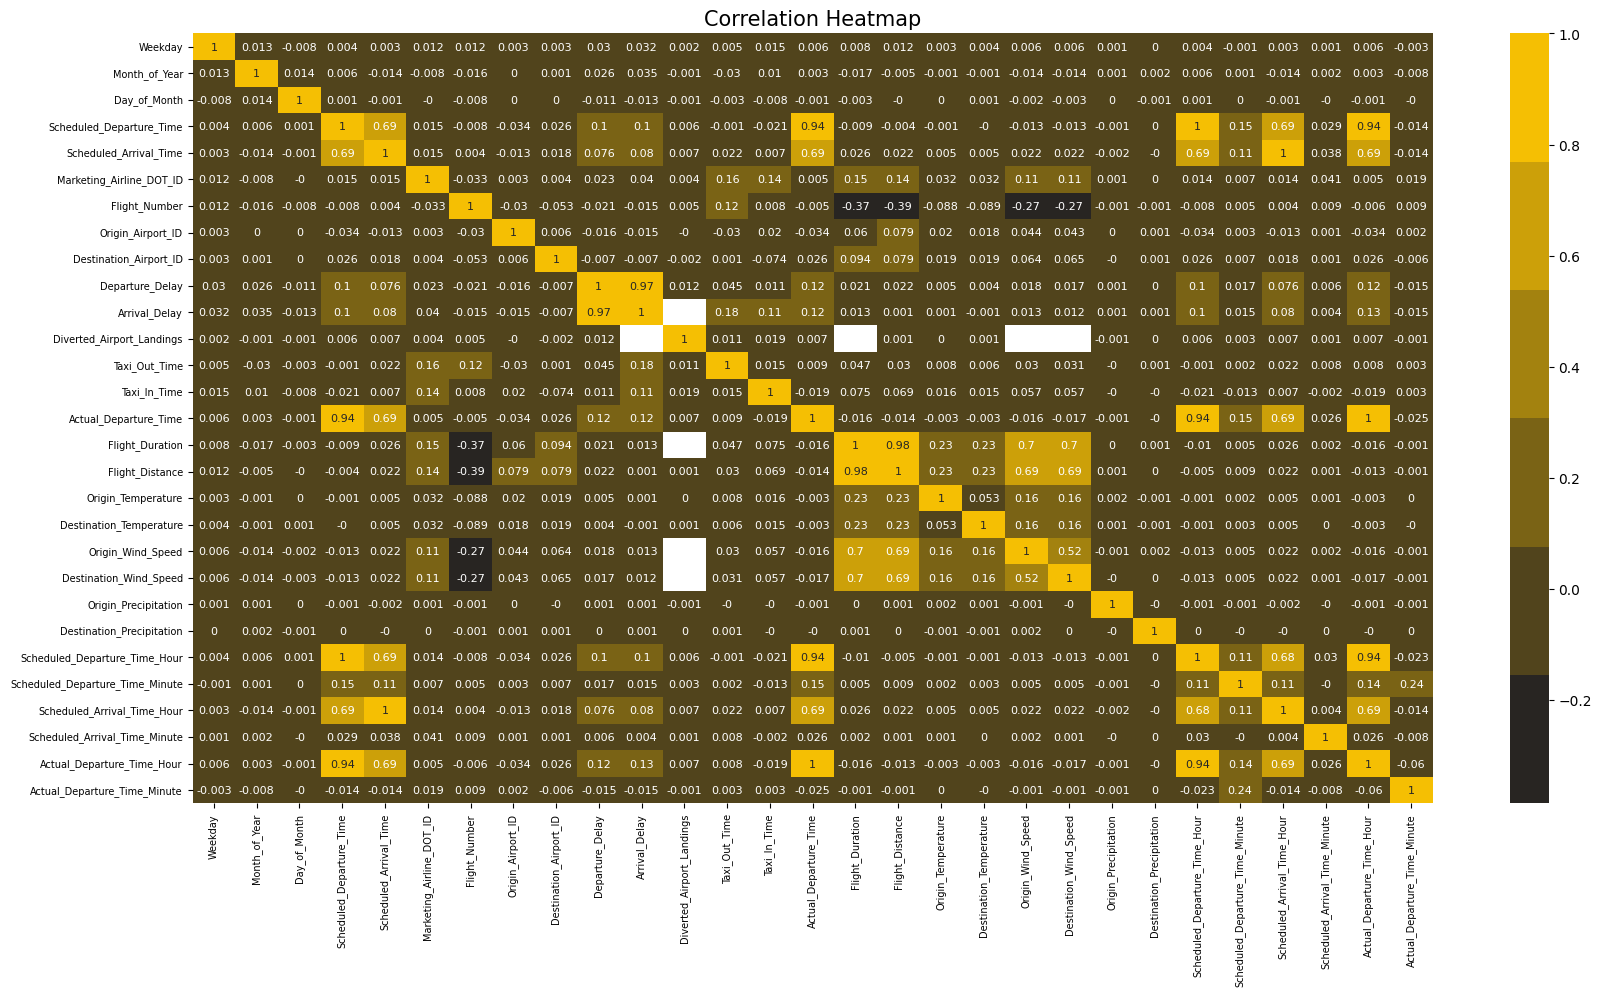

In [ ]:
# Define color palette with different shades of color #8502d1 for multivariate plots
colors_multi = sns.dark_palette("xkcd:golden", as_cmap=False)

# For correlation heatmap, let's consider the numeric features only
correlation_matrix = train.select_dtypes(include='number').corr(method='pearson').round(3)

plt.figure(figsize = (20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap=colors_multi, annot_kws={"size": 8})
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 7)
plt.title('Correlation Heatmap', fontsize = 15)
plt.show()

The heatmap shows the correlation coefficients between the numeric features. Departure Delay has a strong positive correlation with Arrival Delay, which means that as the Departure Delay increases, the arrival delay also tends to increase. The other features (Origin and Destination Precipitation, Flight Duration, Origin and Destination Airport ID etc) show very weak correlations with Arrival Delay, suggesting that these features by themselves do not strongly influence the arrival delay.


### 3.4.2 | Scheduled Departure Dealy vs Actual Departure Time across different Marketing Airline






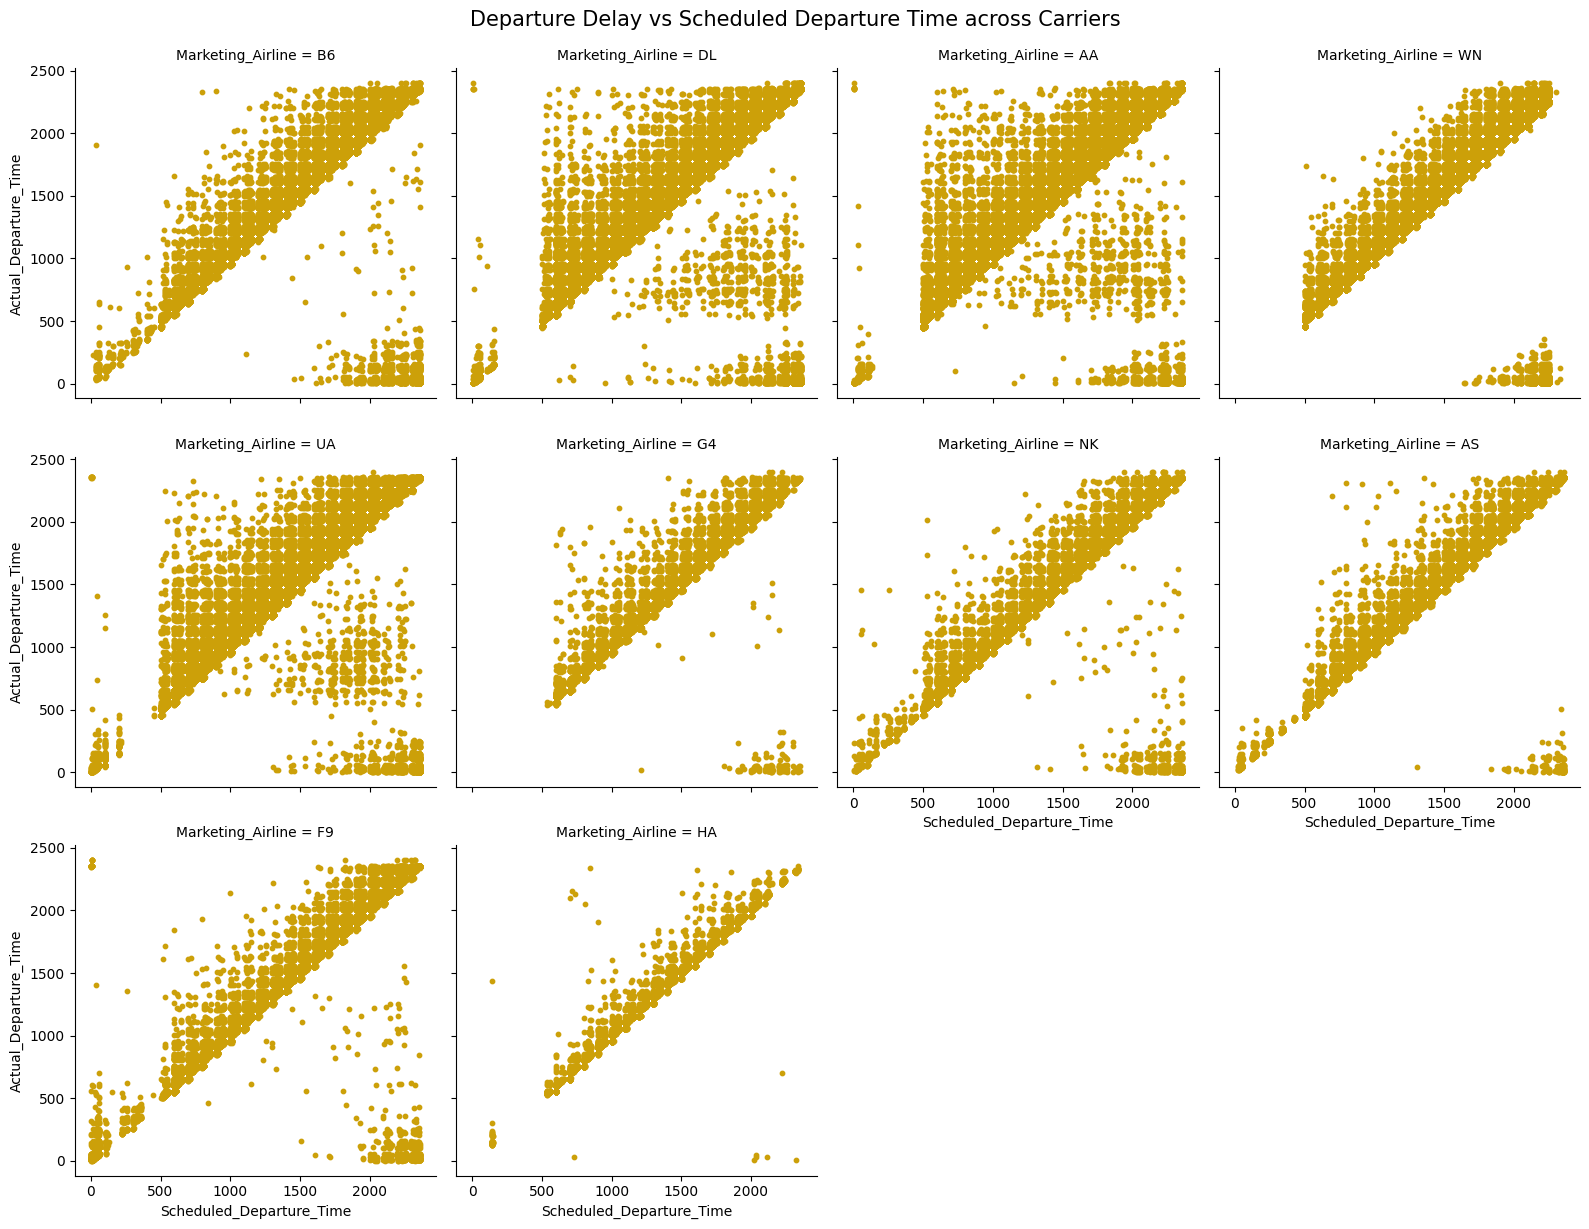

In [ ]:
# Scheduled Departure Dealy vs Departure Time across different Marketing Airline
g = sns.FacetGrid(train, col = "Marketing_Airline", col_wrap = 4, height = 4, aspect = 1)
g.map(plt.scatter, "Scheduled_Departure_Time", "Actual_Departure_Time", color = colors_multi[-2], s = 10)
g.fig.suptitle('Departure Delay vs Scheduled Departure Time across Carriers', fontsize = 15, y = 1.02)
plt.show()

These scatter plots illustrate the relationship between departure delay and departure time across various carriers. Some carriers, such as HA, F9, and G4, exhibit a more pronounced trend of increased departure delay with later departure times, whereas others, like AA, DL, and UA, do not show this pattern. This suggests that the interaction between carrier and departure time could significantly influence arrival delays.

### 3.4.3 | Scheduled Arrival Time vs Arrival Delay across different Marketing Airline






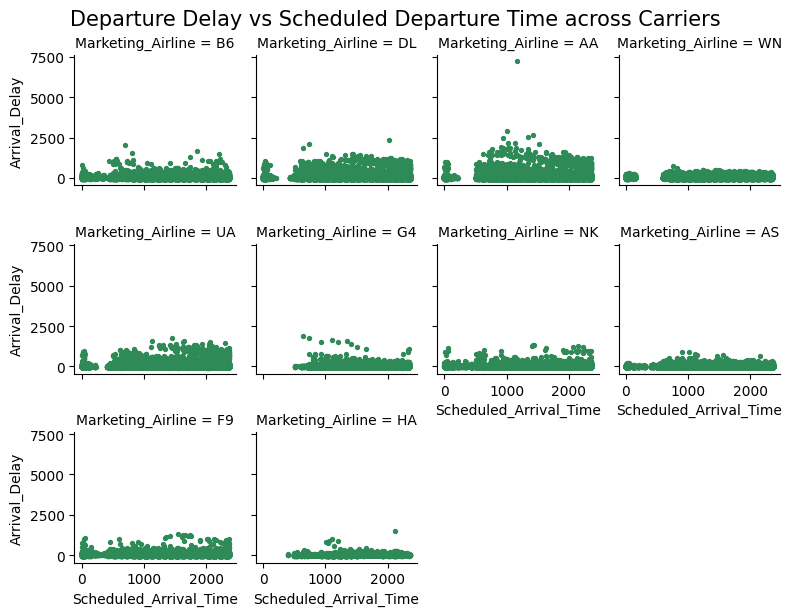

In [ ]:
# Scheduled Departure Dealy vs Departure Time across different Marketing Airline
colors_multi = sns.dark_palette("seagreen", as_cmap=False)

g = sns.FacetGrid(train, col = "Marketing_Airline", col_wrap = 4, height = 2, aspect = 1)
g.map(plt.scatter, "Scheduled_Arrival_Time", "Arrival_Delay", color = colors_multi[-1], s = 8)
g.fig.suptitle('Departure Delay vs Scheduled Departure Time across Carriers', fontsize = 15, y = 1.02)
plt.show()

# Data Preprocessing

## 4.1 | Irrelevant Feature Removal



Based on our careful review and exploratory data analysis so far, here's a rundown of each feature I am going to take out of the picture:

*    Marketing Airline DOT ID: This is a unique identifier assigned to each flight record in the dataset. It carries no informational value for the model, as it does not reflect any characteristic of the flights.

*    Flight Number: This feature represents the designated number of the flight. However, there are many unique flight numbers (3844), which could lead to overfitting. Each flight number corresponds to a specific route, and while it's true that some routes may be more prone to delays than others, the high dimensionality of this feature may be more harmful than helpful.

*    Departure Time and Arrival Time hour: These feature represent the scheduled departure or arrival time hour of the flight, since we have Departure_Time feature, we can remove these features.

*    Departure Time and Arrival Time minute: These features represent the scheduled departure or arrival time minute of the flight, since we have Departure_Time/Arrival_Time feature, we can remove these features.

*    Diverted_Airport_Landings: This feature represents the number of landings at diverted airports. Since the correlation is not available (NaN), it indicates that there might be no variation in this feature, making it uninformative for the model.

*    Origin and Destination Airport ID: These variables represent the airport id. We have Origin and Departure State show flight state and airports are placed in these states. Keeping airport id and state columns are don't make affect, so airport ids will be removed.





In [ ]:
selected_features = ['Weekday', 'Month_of_Year', 'Day_of_Month', 'Scheduled_Departure_Time', 'Scheduled_Arrival_Time', 'Departure_State',
                     'Arrival_State', 'Flight_Cancelled', 'Departure_Delay', 'Arrival_Delay', 'Taxi_Out_Time', 'Taxi_In_Time', 'Flight_Diverted',
                     'Actual_Departure_Time', 'Flight_Duration', 'Flight_Distance', 'Origin_Temperature', 'Destination_Temperature',
                     'Origin_Wind_Speed', 'Destination_Wind_Speed', 'Origin_Precipitation', 'Destination_Precipitation']

df_train = train[selected_features].copy()

# select the features for test data
df_test = test[list(set(selected_features)^set(['Arrival_Delay']))].copy()

df_train.head()

Weekday  Month_of_Year  Day_of_Month  Scheduled_Departure_Time  \
0        6              6            25                      1222   
1        2              6            21                      1216   
2        3              1             5                      1945   
3        2              3            22                       700   
4        4              7            14                      2130   

   Scheduled_Arrival_Time Departure_State Arrival_State  Flight_Cancelled  \
0                    1444              GA            NY             False   
1                    1304              AZ            AZ             False   
2                    2055              MN            WI             False   
3                     924              FL            TX             False   
4                    2359              WA            NV             False   

   Departure_Delay  Arrival_Delay  Taxi_Out_Time  Taxi_In_Time  \
0              NaN            NaN           16.0          10.0   
1         0.088687      -4.178483           16.0           5.0   
2              NaN       5.042185           34.0           5.0   
3        -1.802698      -0.206932           10.0          11.0   
4              NaN      14.006092           23.0           7.0   

   Flight_Diverted  Actual_Departure_Time  Flight_Duration  Flight_Distance  \
0            False                 1224.0            107.0            760.0   
1            False                 1216.0             23.0            110.0   
2            False                 1945.0             36.0            119.0   
3            False                  658.0            125.0            641.0   
4            False                 2133.0            130.0            867.0   

   Origin_Temperature  Destination_Temperature  Origin_Wind_Speed  \
0           25.140220                19.357739          21.019808   
1           13.279939                20.470690          18.045064   
2           17.816202                13.967273          21.606228   
3           24.562566                14.509228          24.946489   
4            8.817992                10.866812          17.426336   

   Destination_Wind_Speed  Origin_Precipitation  Destination_Precipitation  
0               15.452723                   0.0                        0.0  
1               12.910265                   0.0                        0.0  
2               17.976362                   0.0                        0.1  
3               22.630553                   0.0                        0.0  
4               17.401007                   0.0                        0.0

## 4.2 | Missing Values Treatment



Missing data can disrupt many machine learning algorithms. It's crucial to handle these appropriately. Depending on the nature of the data and the percentage of missing values, we can:

*    Drop the rows or columns with missing data, especially if the percentage of missing data is very high.
*    Fill the missing data with a central tendency measure (mean, median, or mode).



In [ ]:
# Check the percentage of missing values in each column
missing_percent = df_train.isnull().mean().sort_values(ascending = False) * 100
print("Missing Value Percentage by Columns:\n\n", round(missing_percent, 2))

Missing Value Percentage by Columns:

 Destination_Wind_Speed       12.96
Origin_Wind_Speed            12.96
Flight_Duration              12.96
Arrival_Delay                12.95
Departure_Delay              12.66
Destination_Temperature      10.00
Origin_Temperature           10.00
Flight_Distance              10.00
Taxi_In_Time                  3.06
Taxi_Out_Time                 3.02
Actual_Departure_Time         2.96
Origin_Precipitation          0.00
Weekday                       0.00
Flight_Diverted               0.00
Month_of_Year                 0.00
Flight_Cancelled              0.00
Arrival_State                 0.00
Departure_State               0.00
Scheduled_Arrival_Time        0.00
Scheduled_Departure_Time      0.00
Day_of_Month                  0.00
Destination_Precipitation     0.00
dtype: float64


Some of the missing values belong to the target column (Arrival Delay). So, first I am going to drop rows with missing target values (Arrival Delay) to avoid introducing bias into our model. This is because we want our model to learn from actual observations, not from imputed values:

In [ ]:
df_train.dropna(subset = ['Arrival_Delay'], inplace = True)
df_train.reset_index(drop = True, inplace = True)

Let's use visualization techniques to see the missing values for each column in dataset

<Figure size 1000x600 with 0 Axes>

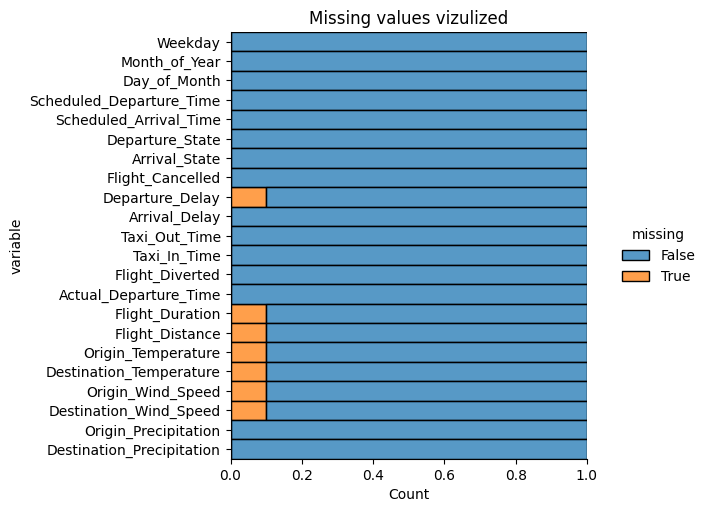

In [ ]:
# visluaize missing vlaues
plt.figure(figsize=(10,6))
sns.displot(
    data = df_train.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.title('Missing values vizulized')
plt.show()

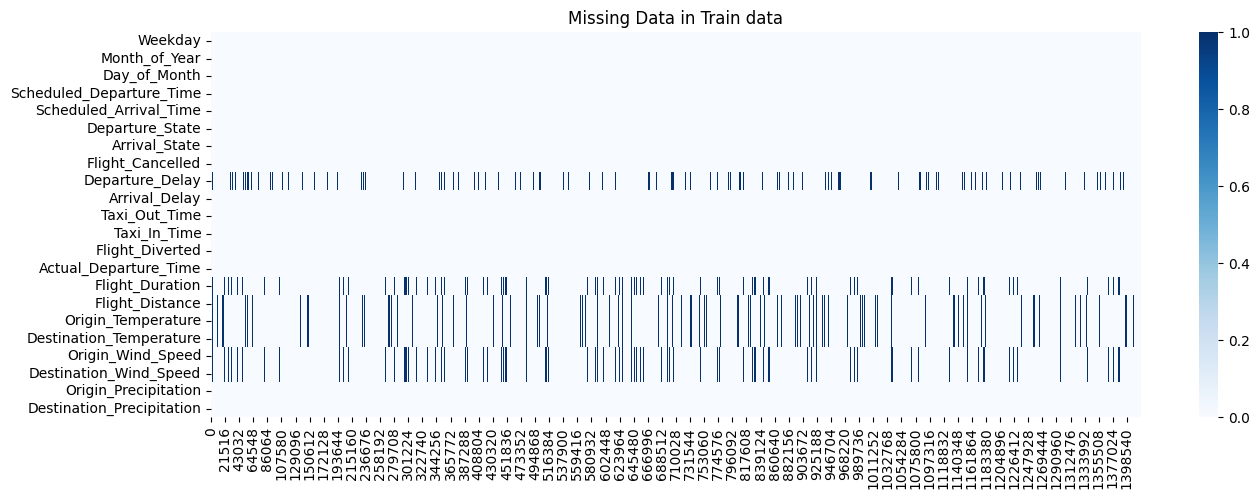

In [ ]:
plt.subplots(figsize=(15,5))
sns.heatmap(df_train.isnull().transpose(), cmap = 'Blues')
plt.title("Missing Data in Train data")
plt.show()

<Figure size 1000x600 with 0 Axes>

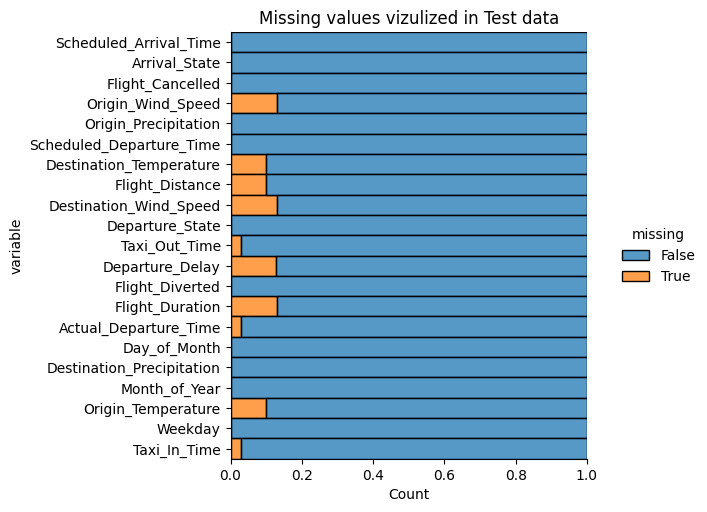

In [ ]:
# visluaize missing vlaues
plt.figure(figsize=(10,6))
sns.displot(
    data = df_test.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.title('Missing values vizulized in Test data')
plt.show()

In [ ]:
# check dataset has duplicates
print('Number of Duplicates in Train dataset : ', df_train.duplicated().sum())
print('Number of Duplicates in Test dataset : ', df_test.duplicated().sum())

Number of Duplicates in Train dataset :  0
Number of Duplicates in Test dataset :  0


Well, we don't have any duplicates in both datasets, now we replace missing values in the feature columns

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# categorical column imputing
def label_encoder(df, column):
  lb = LabelEncoder()

  # fit and transform the column
  df[column] = lb.fit_transform(df[column].astype(str))

  # replace missing values with the most frequent value
  most_frequent = df[column].mode()[0]
  df[column].fillna(most_frequent, inplace=True)

  return df

# numerical column imputing
def numeric_imputer(df, column, strategy = 'mean'):
  # define the imputer
  mean_imputer = SimpleImputer(strategy = strategy)

  # apply imputer to the column
  df[[column]] = mean_imputer.fit_transform(df[[column]])

  return df

# all in one
def data_imputer(df):

  # get all column that contains missng value
  missing_value_columns = df.columns[df.isnull().sum() > 0]

  # numeric columns that contain missing value
  numerical_columns = df[missing_value_columns].select_dtypes(include = 'number').columns

  # apply to each numerical column
  for column in numerical_columns:
    df = numeric_imputer(df, column, strategy = 'mean')

  print(f'Numerical imputing is finished, encoded columns: {list(numerical_columns)}')

  # categorical column that cointans missing values
  categorical_columns = df.select_dtypes(include = 'object').columns

  # apply to each numerical column
  for column in categorical_columns:
    df = label_encoder(df, column)
  print(f'Categorical encoding is finished, encoded columns: {list(categorical_columns)}')

  # boolen columns encoding
  boolen_columns = df.select_dtypes(include = 'bool').columns

  for column in boolen_columns:
    df[column] = df[column].astype(int)

  print(f'Boolen imputing is finished, encoded columns: {list(boolen_columns)}')
  return df


# let's apply imputer to the dataset
cleaned_train = data_imputer(df_train)
cleaned_test = data_imputer(df_test)


# print missing values for each dataset
display(cleaned_train.isnull().sum())

print('\n\n')

display(cleaned_test.isnull().sum())

Numerical imputing is finished, encoded columns: ['Departure_Delay', 'Flight_Duration', 'Flight_Distance', 'Origin_Temperature', 'Destination_Temperature', 'Origin_Wind_Speed', 'Destination_Wind_Speed']
Categorical encoding is finished, encoded columns: ['Departure_State', 'Arrival_State']
Boolen imputing is finished, encoded columns: ['Flight_Cancelled', 'Flight_Diverted']
Numerical imputing is finished, encoded columns: ['Taxi_Out_Time', 'Origin_Temperature', 'Flight_Distance', 'Actual_Departure_Time', 'Origin_Wind_Speed', 'Flight_Duration', 'Taxi_In_Time', 'Destination_Wind_Speed', 'Destination_Temperature', 'Departure_Delay']
Categorical encoding is finished, encoded columns: ['Arrival_State', 'Departure_State']
Boolen imputing is finished, encoded columns: ['Flight_Cancelled', 'Flight_Diverted']


Weekday                      0
Month_of_Year                0
Day_of_Month                 0
Scheduled_Departure_Time     0
Scheduled_Arrival_Time       0
Departure_State              0
Arrival_State                0
Flight_Cancelled             0
Departure_Delay              0
Arrival_Delay                0
Taxi_Out_Time                0
Taxi_In_Time                 0
Flight_Diverted              0
Actual_Departure_Time        0
Flight_Duration              0
Flight_Distance              0
Origin_Temperature           0
Destination_Temperature      0
Origin_Wind_Speed            0
Destination_Wind_Speed       0
Origin_Precipitation         0
Destination_Precipitation    0
dtype: int64

Taxi_Out_Time                0
Origin_Temperature           0
Destination_Precipitation    0
Weekday                      0
Flight_Cancelled             0
Arrival_State                0
Flight_Distance              0
Month_of_Year                0
Actual_Departure_Time        0
Flight_Diverted              0
Origin_Wind_Speed            0
Scheduled_Arrival_Time       0
Scheduled_Departure_Time     0
Flight_Duration              0
Taxi_In_Time                 0
Day_of_Month                 0
Departure_State              0
Destination_Wind_Speed       0
Destination_Temperature      0
Origin_Precipitation         0
Departure_Delay              0
dtype: int64

## 4.3 | Feature Scaling

In [ ]:
# changing the format of time to minute (minutes from 00:00):
def hhmm_to_minutes(time):
    hh = time // 100
    mm = time % 100
    return int(hh * 60 + mm)

# apply conversion function to multiple time columns
def convert_time_columns(df, time_columns):
    for column in time_columns:
        df[f'{column}_Minutes'] = df[column].apply(hhmm_to_minutes)
    return df

# list of time columns to convert
time_columns = ['Scheduled_Departure_Time', 'Scheduled_Arrival_Time', 'Actual_Departure_Time', ]

# Convert time columns
cleaned_train = convert_time_columns(cleaned_train, time_columns)
cleaned_test = convert_time_columns(cleaned_test, time_columns)

# drop time columns
cleaned_train.drop(time_columns, axis = 1, inplace = True)
cleaned_test.drop(time_columns, axis = 1, inplace = True)

# save datasets

path = '/content/drive/MyDrive/Machine Learning 1 - final Project/'

cleaned_train.to_csv(path + 'cleaned_train.csv', index = False)
cleaned_test.to_csv(path + 'cleaned_test.csv', index = False)


cleaned_train.head()

Weekday  Month_of_Year  Day_of_Month  Departure_State  Arrival_State  \
0        2              6            21                3              3   
1        3              1             5               22             50   
2        2              3            22                8             44   
3        4              7            14               49             32   
4        1              5            30                4              4   

   Flight_Cancelled  Departure_Delay  Arrival_Delay  Taxi_Out_Time  \
0                 0         0.088687      -4.178483           16.0   
1                 0        13.027852       5.042185           34.0   
2                 0        -1.802698      -0.206932           10.0   
3                 0        13.027852      14.006092           23.0   
4                 0        -2.181755     -14.067374           10.0   

   Taxi_In_Time  Flight_Diverted  Flight_Duration  Flight_Distance  \
0           5.0                0             23.0            110.0   
1           5.0                0             36.0            119.0   
2          11.0                0            125.0            641.0   
3           7.0                0            130.0            867.0   
4           5.0                0             58.0            417.0   

   Origin_Temperature  Destination_Temperature  Origin_Wind_Speed  \
0           13.279939                20.470690          18.045064   
1           17.816202                13.967273          21.606228   
2           24.562566                14.509228          24.946489   
3            8.817992                10.866812          17.426336   
4            9.360464                15.977111          19.001179   

   Destination_Wind_Speed  Origin_Precipitation  Destination_Precipitation  \
0               12.910265                   0.0                        0.0   
1               17.976362                   0.0                        0.1   
2               22.630553                   0.0                        0.0   
3               17.401007                   0.0                        0.0   
4               16.884960                   0.0                        0.0   

   Scheduled_Departure_Time_Minutes  Scheduled_Arrival_Time_Minutes  \
0                               736                             784   
1                              1185                            1255   
2                               420                             564   
3                              1290                            1439   
4                               470                             555   

   Actual_Departure_Time_Minutes  
0                            736  
1                           1185  
2                            418  
3                           1293  
4                            468

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# List of columns to scale
columns_to_scale = ['Scheduled_Departure_Time_Minutes', 'Scheduled_Arrival_Time_Minutes', 'Departure_Delay',
                    'Taxi_Out_Time', 'Taxi_In_Time', 'Actual_Departure_Time_Minutes', 'Flight_Duration', 'Flight_Distance',
                    'Origin_Temperature', 'Destination_Temperature', 'Origin_Wind_Speed', 'Destination_Wind_Speed',
                    'Origin_Precipitation', 'Destination_Precipitation']

# Function to scale specified columns
def scale_columns(df, columns):
    scaler = MinMaxScaler(feature_range = (0,1))
    df[columns] = scaler.fit_transform(df[columns])

    return df

# Example usage
df_train_scaled = scale_columns(cleaned_train, columns_to_scale)
df_test_scaled = scale_columns(cleaned_test, list(set(columns_to_scale) ^ set(['Arrival_Delay'])))

df_train_scaled.head()

Weekday  Month_of_Year  Day_of_Month  Departure_State  Arrival_State  \
0        2              6            21                3              3   
1        3              1             5               22             50   
2        2              3            22                8             44   
3        4              7            14               49             32   
4        1              5            30                4              4   

   Flight_Cancelled  Departure_Delay  Arrival_Delay  Taxi_Out_Time  \
0                 0         0.010740       0.013074       0.068182   
1                 0         0.012512       0.014332       0.150000   
2                 0         0.010481       0.013616       0.040909   
3                 0         0.012512       0.015554       0.100000   
4                 0         0.010429       0.011726       0.040909   

   Taxi_In_Time  Flight_Diverted  Flight_Duration  Flight_Distance  \
0      0.014337                0         0.022489         0.015600   
1      0.014337                0         0.041979         0.017378   
2      0.035842                0         0.175412         0.120458   
3      0.021505                0         0.182909         0.165087   
4      0.014337                0         0.074963         0.076224   

   Origin_Temperature  Destination_Temperature  Origin_Wind_Speed  \
0            0.441087                 0.579359           0.399543   
1            0.535974                 0.439282           0.486707   
2            0.677090                 0.450956           0.568465   
3            0.347755                 0.372502           0.384399   
4            0.359102                 0.482572           0.422945   

   Destination_Wind_Speed  Origin_Precipitation  Destination_Precipitation  \
0                0.267824                   0.0                       0.00   
1                0.392063                   0.0                       0.05   
2                0.506201                   0.0                       0.00   
3                0.377953                   0.0                       0.00   
4                0.365298                   0.0                       0.00   

   Scheduled_Departure_Time_Minutes  Scheduled_Arrival_Time_Minutes  \
0                          0.511127                        0.544506   
1                          0.823366                        0.872045   
2                          0.291377                        0.391516   
3                          0.896384                        1.000000   
4                          0.326147                        0.385257   

   Actual_Departure_Time_Minutes  
0                       0.510771  
1                       0.822794  
2                       0.289785  
3                       0.897846  
4                       0.324531

In [ ]:
# save the scaled datasets

path = '/content/drive/MyDrive/Machine Learning 1 - final Project/'

df_train_scaled.to_csv(path + 'scaled_train.csv', index = False)
df_test_scaled.to_csv(path + 'scaled_test.csv', index = False)
